# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Importing data from csv file
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

## Data Overview

In [3]:
# Verifying the shape of the dataset
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

There are 36,275 observations with 19 columns in the dataset.

In [4]:
# Copying into a dataframe, to retain the original dataframe as is
df = data.copy()

<IPython.core.display.Javascript object>

In [5]:
# Finding the shape of the copied dataframe
df.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [6]:
# Verifying sample rows from the input, using random seed so as to get the same sample every time
np.random.seed(1)
df.sample(n=10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Selected                           0   
10969                  4       Meal Plan 1                           0   
24881                  7       Meal Plan 1                           0   
28658                  3       Meal Plan 2                           0   
20853                  2       Meal Plan 1                           0   
8501                   3       Meal Plan 1                           0   
1942                   2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30392        Room_Type 1         53          2018              9   
6685         Room_Type 1         63          2018              4   
8369         Room_Type 4         55          2018              9   
2055         Room_Type 1         53          2017             12   
10969        Room_Type 1        245          2018              7   
24881        Room_Type 2        231          2018              8   
28658        Room_Type 1         71          2018              5   
20853        Room_Type 1         66          2017             10   
8501         Room_Type 2         40          2018              1   
1942         Room_Type 1         63          2018              8   

       arrival_date market_segment_type  repeated_guest  \
30392            11              Online               0   
6685             22              Online               0   
8369             11              Online               0   
2055             29              Online               0   
10969             6             Offline               0   
24881             1              Online               0   
28658            10             Offline               0   
20853             9             Offline               0   
8501             14              Online               0   
1942              9              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
30392                             0                                     0   
6685                              0                                     0   
8369                              0                                     0   
2055                              0                                     0   
10969                             0                                     0   
24881                             0                                     0   
28658                             0                                     0   
20853                             0                                     0   
8501                              0                                     0   
1942                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
30392            94.32000                       0   Not_Canceled  
6685            1

<IPython.core.display.Javascript object>

The sample rows show there is good representation of data for cancelled and not-cancelled rows; need to check in value count detail from the whole dataset. Also need to check if any missing values in any of the data columns.

In [7]:
# Verifying the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

The info() shows there are 19 columns,5 of which are of Object type, 1 float and rest are all integer columns.
We could convert the Object variables to Categories.

In [8]:
cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
for col in cols:
    df[col] = df[col].astype("category")

<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  object  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

<IPython.core.display.Javascript object>

The info now shows the 3 object variables are converted to category and the memory usage has reduced. 

In [10]:
# Checking if there are duplicate values in the dataset at row level
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

This shows there are no row level duplicates in the dataset.

In [11]:
df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

<IPython.core.display.Javascript object>

The describe shows the various statistical details on numerical variables.
Dataset has bookings with maximum of 4 adults, 10 children, 7 weekend and 17 week nights; minimum being 0.
It has data from 2017 and 2018, with average price per room ranging from 0 till 540 euros. There are rest other features too.

In [12]:
# Describe on non-numeric variables
df.describe(exclude="number").T

count unique           top   freq
Booking_ID           36275  36275      INN04341      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

<IPython.core.display.Javascript object>

Booking_ID is unique ID for each booking and it doesnt have any duplicates as expected. Type_of_meal_plan seems to have 4 unique values and Meal PLan 1 having the highest frequency in this dataset. Room_type_reserved has 7 unique values and Room_type 1 has maximum ocurrences in the dataset.
Market_segment_type has 5 unique values and Online being the highest frequency.
Our target variable booking_status has 2 unique values and Not_Canceled is the highest frequency.

In [13]:
# Checking if there are missing values in the dataframe
df.isnull().values.any()

False

<IPython.core.display.Javascript object>

There is no missing values in the dataset.

In [14]:
cols = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]
for col in cols:
    val_cnts = df[col].value_counts()
    print(val_cnts)
    print("**" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
****************************************************************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
****************************************************************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
****************************************************************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
****************************************************************************************************


<IPython.core.display.Javascript object>

This shows the value counts on each of the categorical variables, Mean Plan 3 is the least selected option- which is a Full board meal, breakfast Lunch and dinner. This is quite explainable as most people would not opt for all 3 meals at the staying hotel. Room type category values are encoded by INN Hotels, not much detail provided on what each signifies but ROom Type1 is the most chosen one. 
5 different market segment_type, with Online being the majority; ofcourse most customers would try to book online.
There are 24390 which are not canceled where as 11885 which are canceled.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

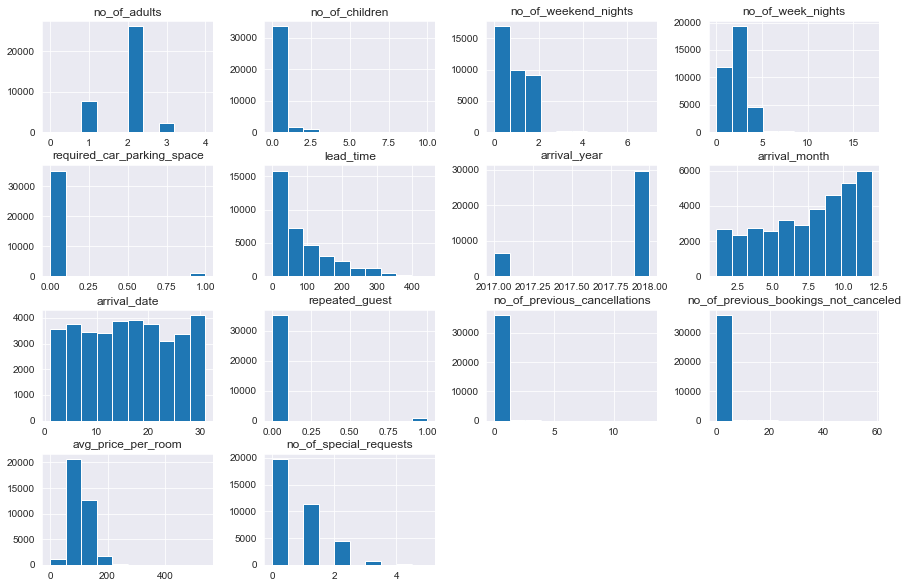

<IPython.core.display.Javascript object>

In [15]:
sns.set_style("darkgrid")
df.hist(figsize=(15, 10))
plt.show()

no_of_children has some rows with high values like 9 and 10; which looks like outliers. Hotels wouldnt be allowing for 9 or 10 children to be staying in a single room.
lead_time has values till around 450 days; so people plan well ahead more than an year earlier. Can check if the booking got canceled later or not.

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

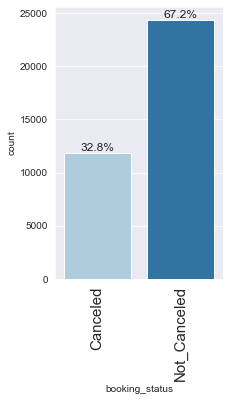

<IPython.core.display.Javascript object>

In [17]:
# Plot on booking_status
labeled_barplot(df, "booking_status", perc=True)

67% of the bookings are not canceled where as 33% got cancelled. This seems to be a huge share and does seem to impact the hotels profit. 

In [18]:
# Replacing the values in booking_status to 0 (not cancelled) and 1 (cancelled)
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

In [19]:
df["booking_status"].dtype

dtype('int64')

<IPython.core.display.Javascript object>

In [20]:
df["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

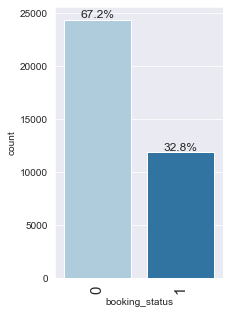

<IPython.core.display.Javascript object>

In [21]:
# Plot on booking_status
labeled_barplot(df, "booking_status", perc=True)

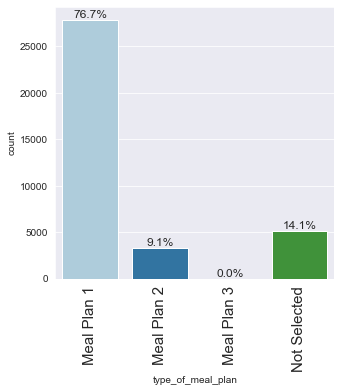

<IPython.core.display.Javascript object>

In [22]:
# Plot on type_of_meal_plan
labeled_barplot(df, "type_of_meal_plan", perc=True)

Around 77% of the bookings chose Meal Plan 1 whcih is Breakfast and its a very neglibile % of bookings for Meal Plan 3.

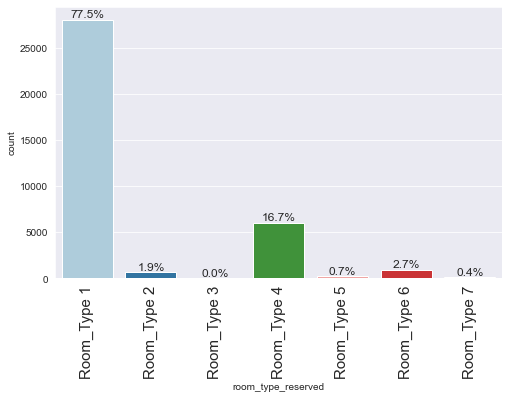

<IPython.core.display.Javascript object>

In [23]:
# Plot on room_type_reserved
labeled_barplot(df, "room_type_reserved", perc=True)

77.5% of bookings chose Room_Type1 and a very negligible % of bookings chose Room_type3.

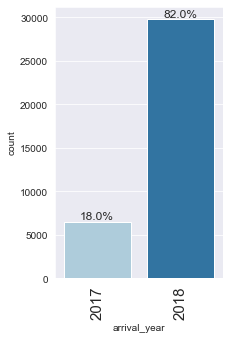

<IPython.core.display.Javascript object>

In [24]:
# Plot on arrival_year
labeled_barplot(df, "arrival_year", perc=True)

82% of data is from year 2018 and rest 18% is from 2017.

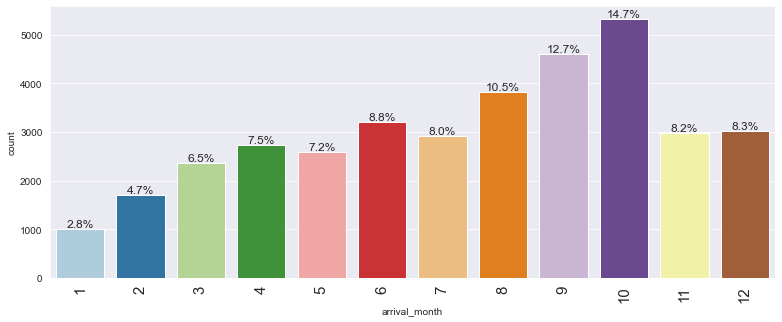

<IPython.core.display.Javascript object>

In [25]:
# Plot on arrival_month
labeled_barplot(df, "arrival_month", perc=True)

The plot shows majority of the bookings happened for the month of October with 14.7% and next Septemebr with 12.7%. Least number of bookings for arrival month January with 2.8%. So October looks to be the busiest month for the INN hotels.

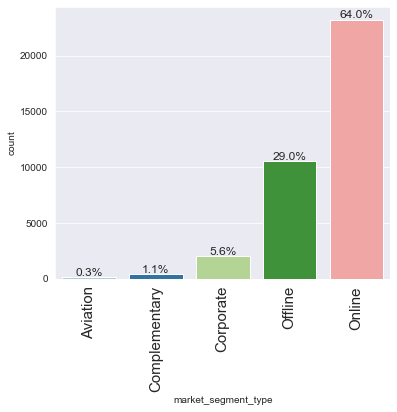

<IPython.core.display.Javascript object>

In [26]:
# Plot on market_segment_type
labeled_barplot(df, "market_segment_type", perc=True)

64% of the bookings are Online and least is 0.3% of the bookings are for Aviation. 

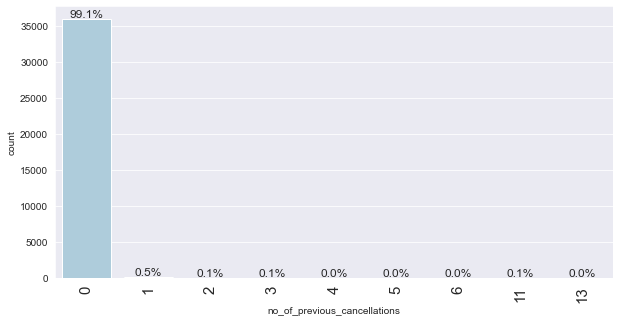

<IPython.core.display.Javascript object>

In [27]:
# Plot on no_of_previous_cancellations
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

Plot shows 99.1% of the bookings, didnt have any history of previous cancellations. One point to note here is, from the rest 1% there were even as high as 11 and 13 times where the previous booking was cancelled.

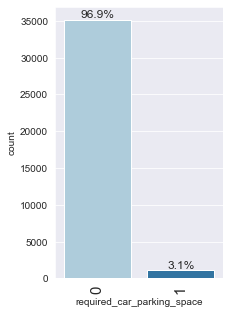

<IPython.core.display.Javascript object>

In [28]:
# Plot on required_car_parking_space
labeled_barplot(df, "required_car_parking_space", perc=True)

Majority 97% of the bookings said they dont need space for car parking. Only 3% bookings chose car parking space.

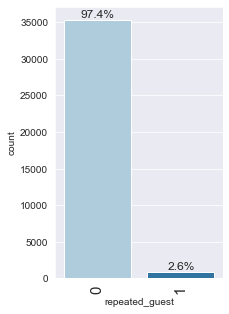

<IPython.core.display.Javascript object>

In [29]:
# Plot on repeated_guest
labeled_barplot(df, "repeated_guest", perc=True)

The plot shows only 2.6% of the bookings are for repeated customers; rest 97.4% are new customers to this hotel.

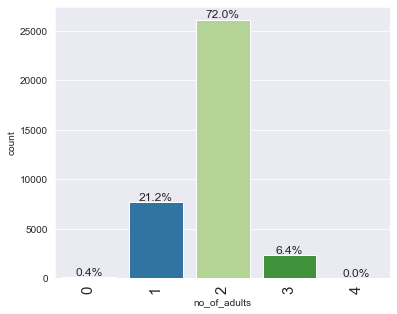

<IPython.core.display.Javascript object>

In [30]:
# Plot on no_of_adults
labeled_barplot(df, "no_of_adults", perc=True)

The plot shows that 72% of the bookings have 2 adults per room, a very minimal of 0.4% have 0 adults and even negligible number of bookings have 4 adults per room.

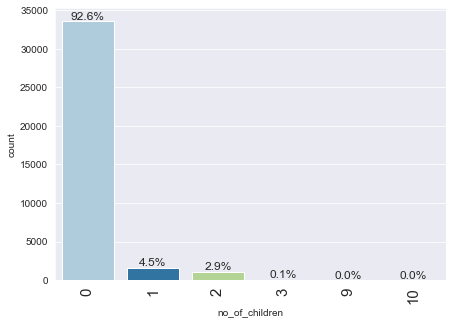

<IPython.core.display.Javascript object>

In [31]:
# Plot on no_of_children
labeled_barplot(df, "no_of_children", perc=True)

The plot shows 92.6% of the bookings do not have children, a very less percentage of bookings have 1,2 and 3 children per room. There are some bookings where the number of children are 9 and 10; these somehow look wierd to me because per my understanding Hotels would not allow more customers in the same room. Need to dig more to understand this.

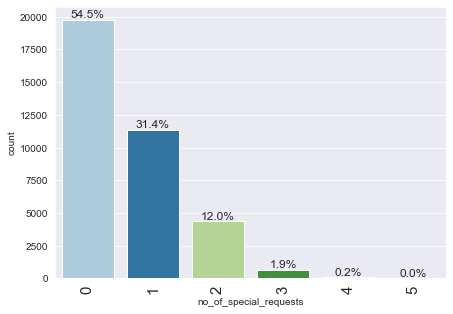

<IPython.core.display.Javascript object>

In [32]:
# Plot on no_of_special_requests
labeled_barplot(df, "no_of_special_requests", perc=True)

From the plot, its shown that 54% bookings didnt have any special requests; 31% had 1 special request and so on..

In [33]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [34]:
df["no_of_weekend_nights"].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

<IPython.core.display.Javascript object>

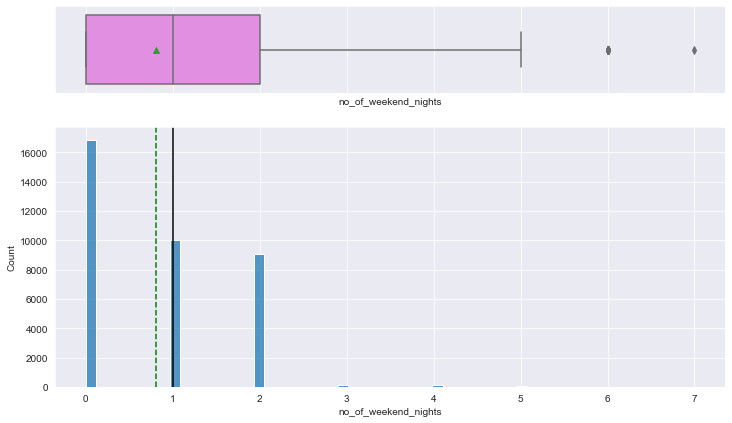

<IPython.core.display.Javascript object>

In [35]:
# Plotting no_of_weekend_nights using a histogram and box plot combination
histogram_boxplot(df, "no_of_weekend_nights")

The plot shows many of the bookings have 0 weekend nights, so probably the customer has come for a business trip so for weekdays only. Values of 1 and 2 are close by and there is very less bookings for 4-7 weekend nights. These are however not outliers, because there is a good possibility that these are valid values.

In [36]:
df["no_of_week_nights"].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

<IPython.core.display.Javascript object>

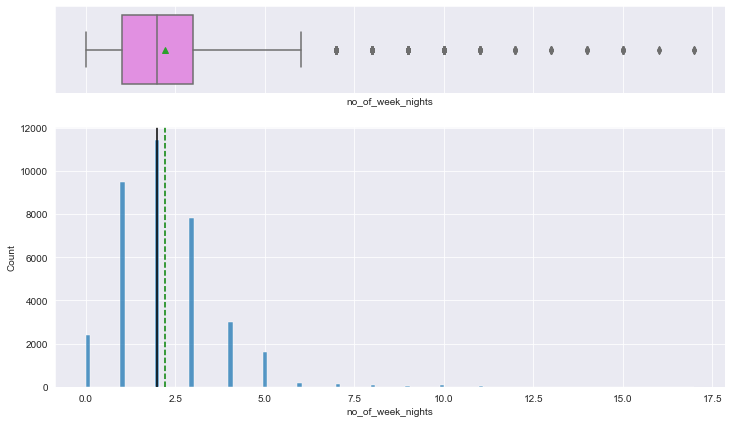

<IPython.core.display.Javascript object>

In [37]:
# Plotting no_of_week_nights using a histogram and box plot combination
histogram_boxplot(df, "no_of_week_nights")

Plot shows majority of the bookings are for 2 week nights. There are very less number of bookings for more than 7 week nights.

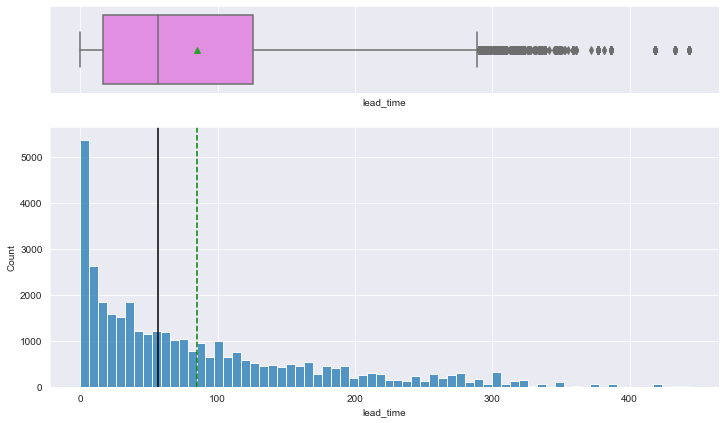

<IPython.core.display.Javascript object>

In [38]:
# Plotting lead_time using a histogram and box plot combination
histogram_boxplot(df, "lead_time")

Lead time shows good number of varied data from 0 till as high as 450 days. 

In [39]:
# Converting lead_time days to months
df["lead_time_months"] = (df["lead_time"] / 30).astype(int)
df["lead_time_months"].value_counts()

0     12152
1      6378
2      4598
3      3519
4      2231
5      1995
6      1585
7       937
8       920
9       835
10      669
11      208
12      146
13       60
14       42
Name: lead_time_months, dtype: int64

<IPython.core.display.Javascript object>

Converting lead time to months; there are many bookings which are done just within a month lead time. But surprisingly there are many bookings which were done more than 10 months lead time. We can check further if these were canceled or not.

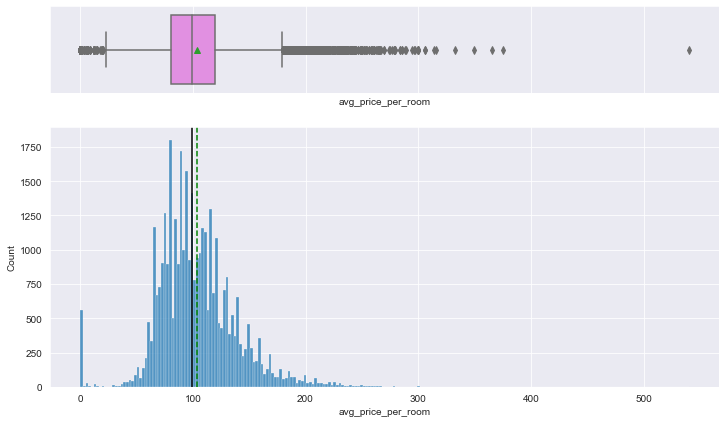

<IPython.core.display.Javascript object>

In [40]:
# Plotting avg_price_per_room using a histogram and box plot combination
histogram_boxplot(df, "avg_price_per_room")

Avg price of the room is concentrated more around ~ 50 to ~ 200 euros. There are some bookings where price of the room is 0 and as low as < ~ 50 euros; probably these are some complementary bookings. We could cehck these further too.  However some with ~ 350 - ~ 500 euros too.

### Bivariate and MultivariateAnalysis

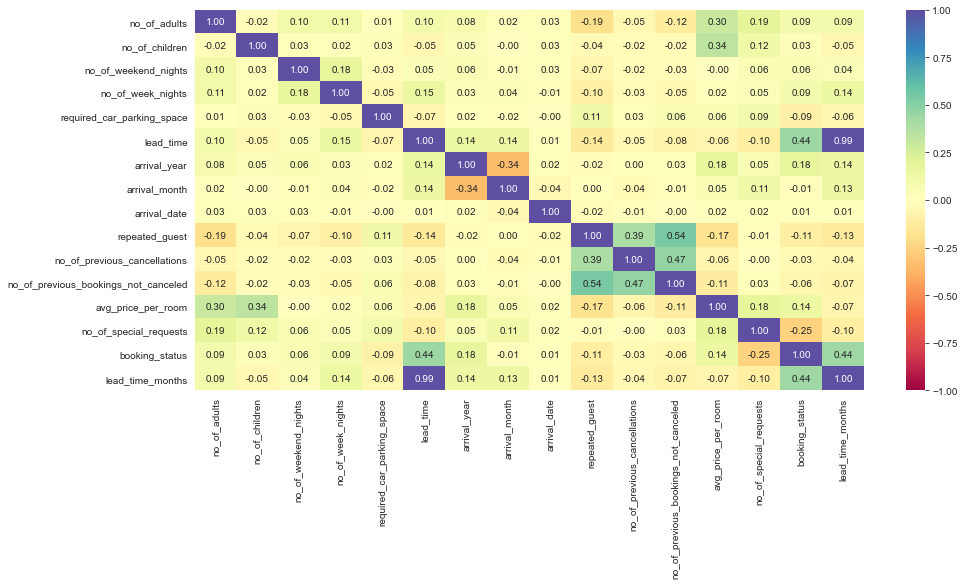

<IPython.core.display.Javascript object>

In [41]:
# Heatmap to display correlation on the attributes against each other
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
# cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    # df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
    df.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

These are the observations from the Heatmap:
* Avg price per room has some positive correlation with no_of_adults and no_of_children.
* Lead time has some positive correlation with booking_status.
* Repeated_guest has positive correlation with no_of_previous_cancellations and more positive correlation with no_of_previous_bookings_not_canceled. 
* No_of_previous_cancelleations and no_of_previous_bookings_not_cancelled also show positive correlation. 

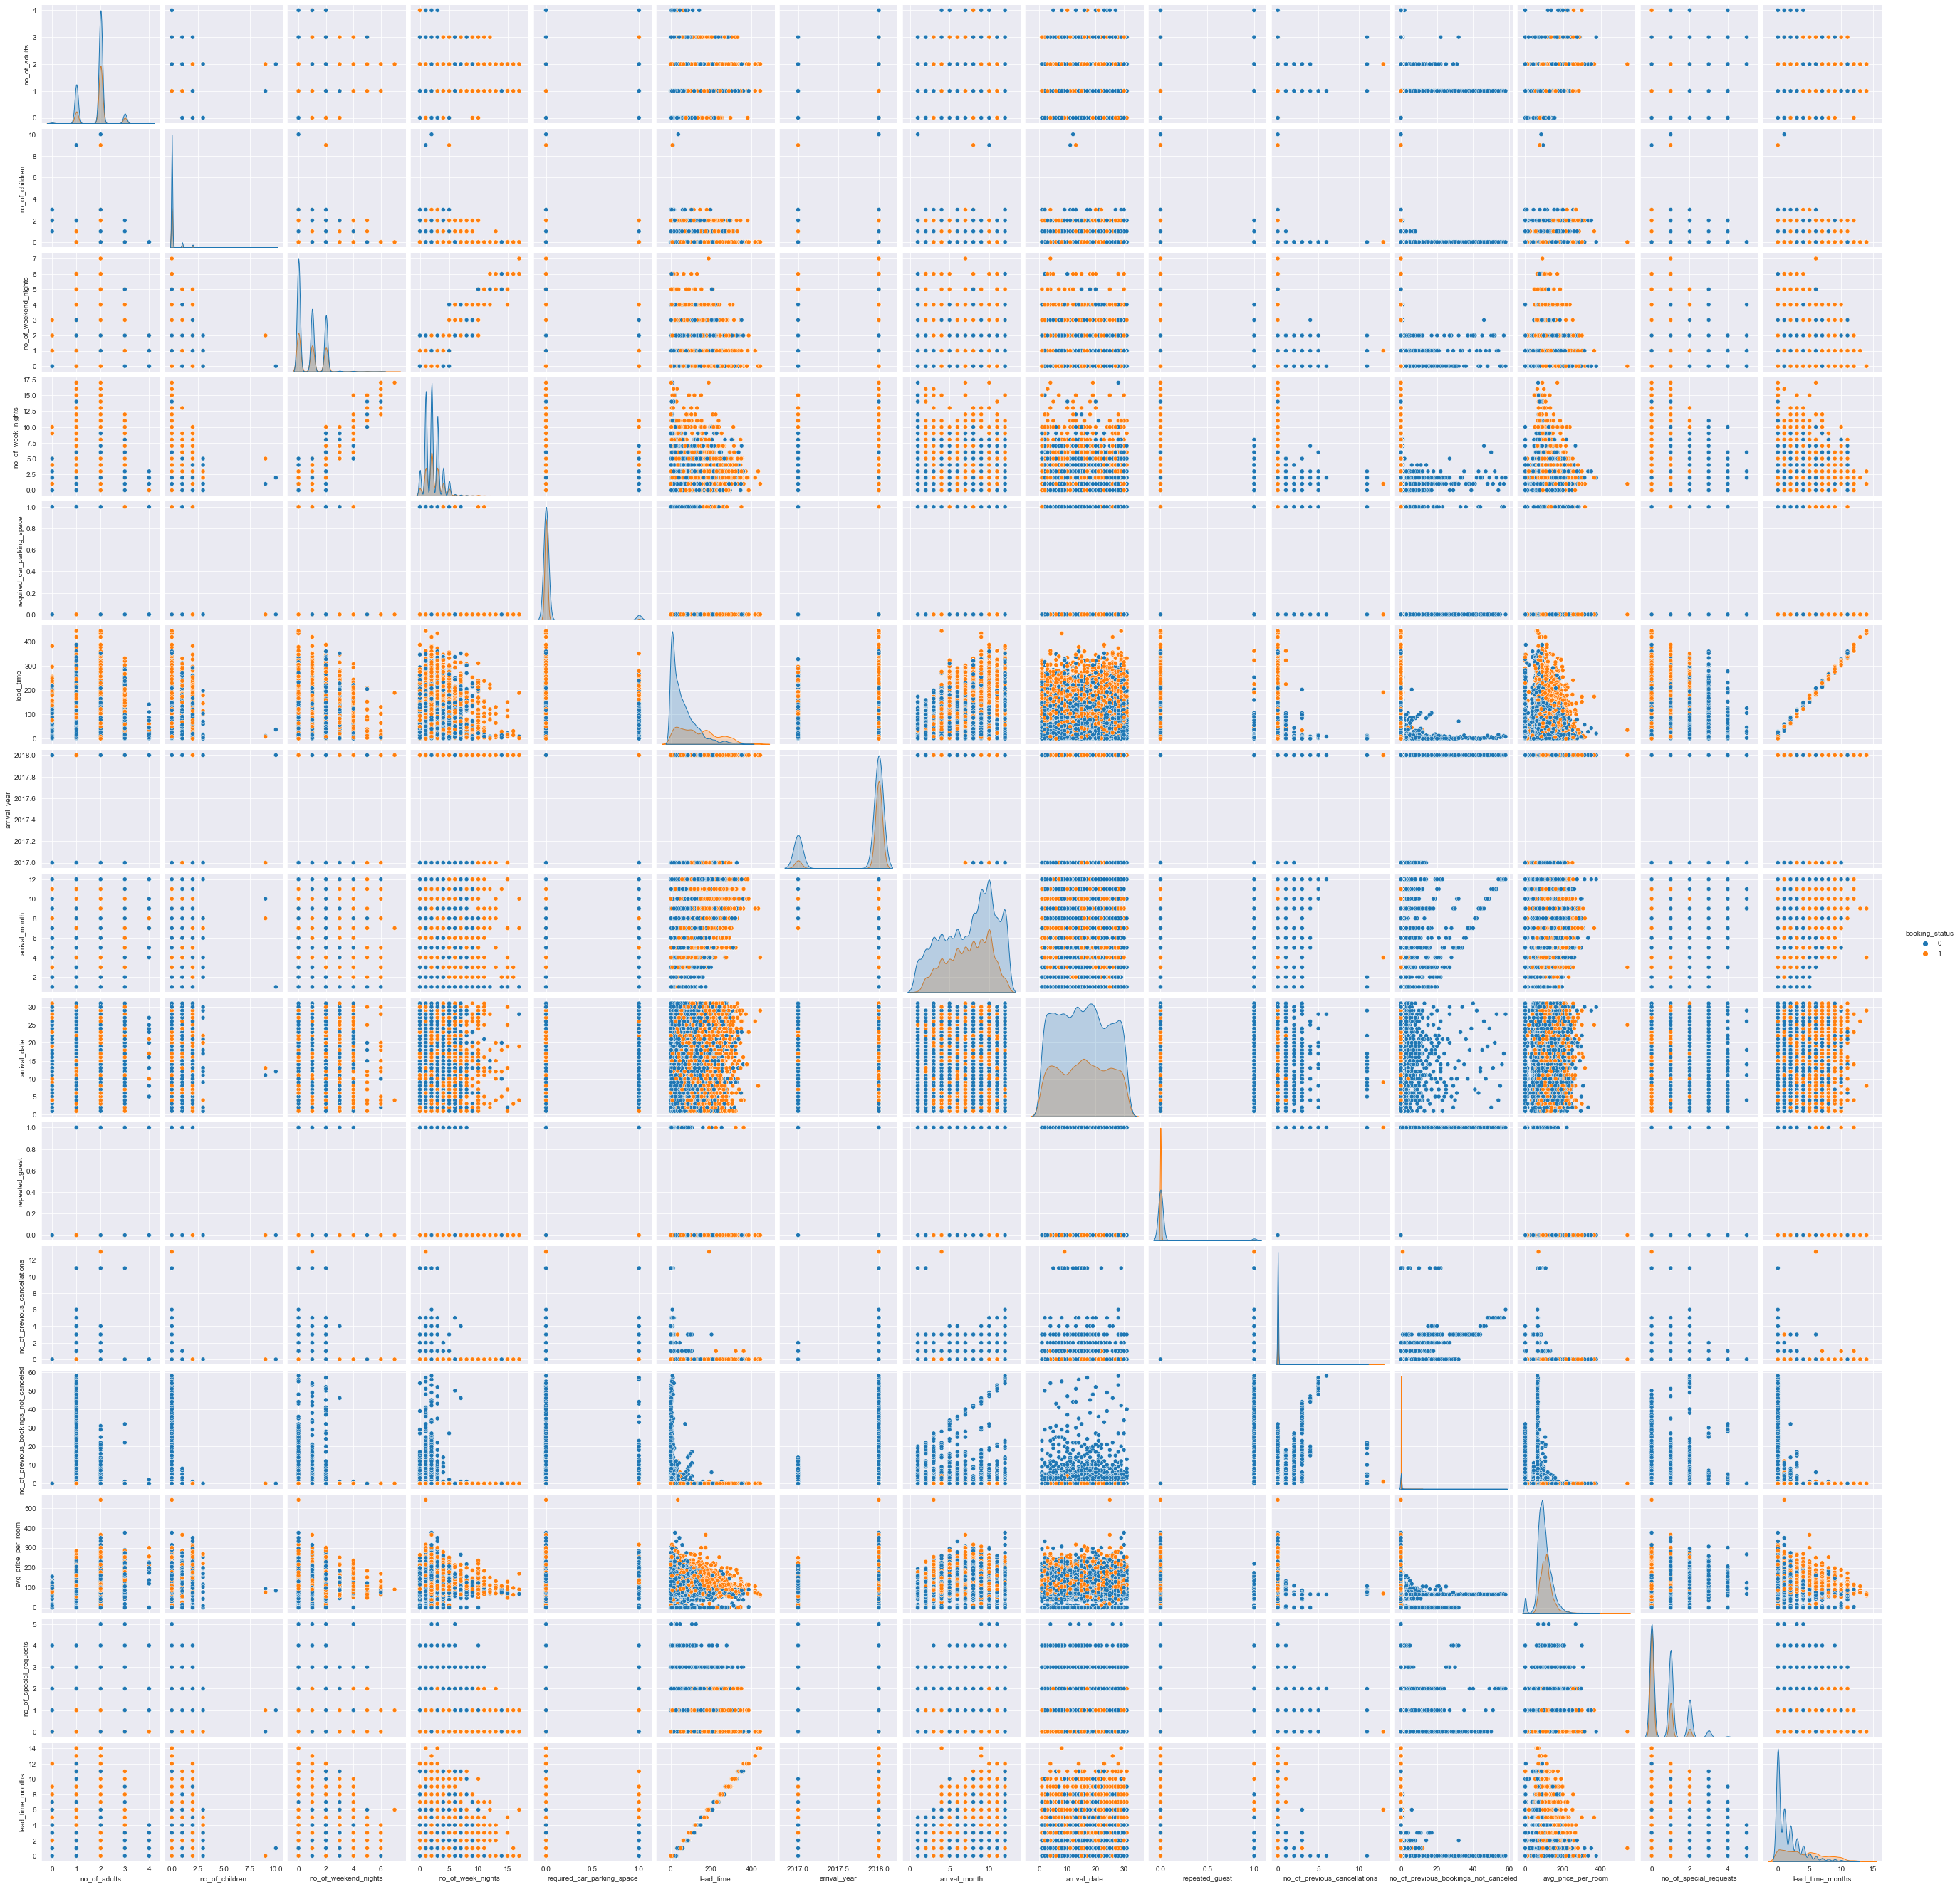

<IPython.core.display.Javascript object>

In [42]:
sns.pairplot(data=df, hue="booking_status")

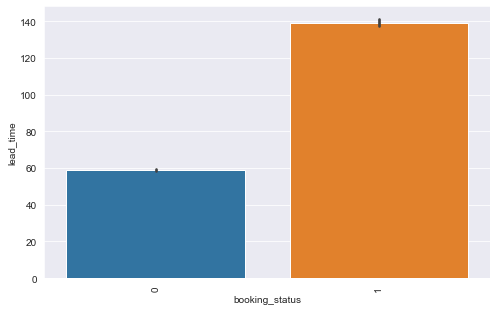

<IPython.core.display.Javascript object>

In [43]:
# Plot to show booking_status vs lead_time
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="booking_status", y="lead_time")
plt.xticks(rotation=90)
plt.show()

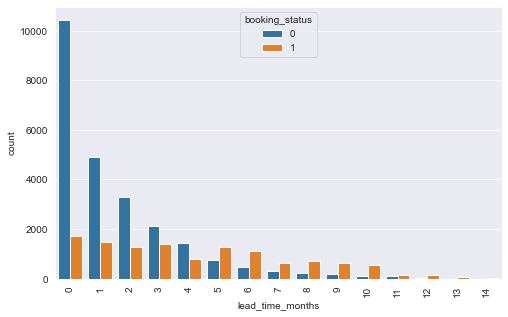

<IPython.core.display.Javascript object>

In [44]:
# Plot to show booking_status vs lead_time
plt.figure(figsize=(8, 5))
sns.countplot(data=df, hue="booking_status", x="lead_time_months")
plt.xticks(rotation=90)
plt.show()

The plot shows majority of the bookings are within 1 months lead time and most of them were not canceled. The bookings percentage with highest lead time looks more canceled. 

In [45]:
# Creating a data frame with lead time > 100 days
df_lead_time = df[(df["lead_time"] > 100)]
df_lead_time.shape

(11890, 20)

<IPython.core.display.Javascript object>

In [46]:
# Finding the booking status for the dataframe with bookings where lead time > 100 days
df_lead_time["booking_status"].value_counts()

1    6981
0    4909
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

Out of the 11890 bookings with lead time > 100, 6900 odd bookings got canceled. There could be many unavoidable circurmstances that might arrive, because of which the plan wouldnt work out and customer might be cancelling the booking that they booked well ahead.

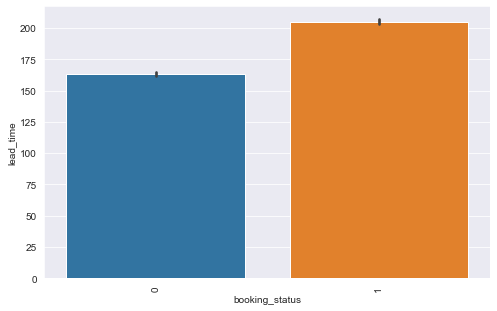

<IPython.core.display.Javascript object>

In [47]:
# Plot to show booking_status vs lead_time
plt.figure(figsize=(8, 5))
sns.barplot(data=df_lead_time, x="booking_status", y="lead_time")
plt.xticks(rotation=90)
plt.show()

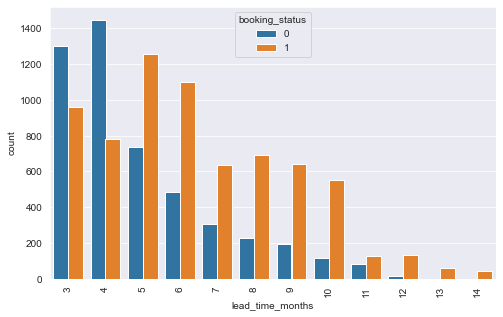

<IPython.core.display.Javascript object>

In [48]:
# Plot to show booking_status vs lead_time
plt.figure(figsize=(8, 5))
sns.countplot(data=df_lead_time, hue="booking_status", x="lead_time_months")
plt.xticks(rotation=90)
plt.show()

The bookings that were done more than 3months lead time, a greater ratio got canceled. 

In [49]:
# Finding number of records for booking status per each arrival month
df.groupby(df["arrival_month"])["booking_status"].value_counts()

arrival_month  booking_status
1              0                  990
               1                   24
2              0                 1274
               1                  430
3              0                 1658
               1                  700
4              0                 1741
               1                  995
5              0                 1650
               1                  948
6              0                 1912
               1                 1291
7              0                 1606
               1                 1314
8              0                 2325
               1                 1488
9              0                 3073
               1                 1538
10             0                 3437
               1                 1880
11             0                 2105
               1                  875
12             0                 2619
               1                  402
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

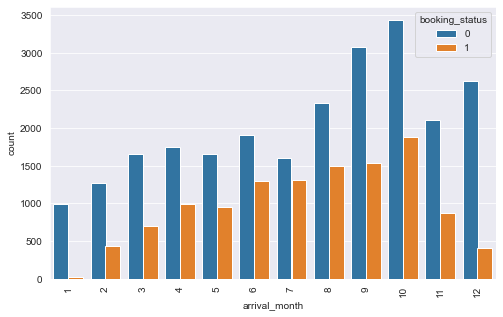

<IPython.core.display.Javascript object>

In [50]:
# Plot to show booking_status vs arrival_month
plt.figure(figsize=(8, 5))
sns.countplot(data=df, hue="booking_status", x="arrival_month")
plt.xticks(rotation=90)
plt.show()

For the month of October, there were highest total number of bookings. October also has the maximum number of canceled bookings. 

<Figure size 1008x360 with 0 Axes>

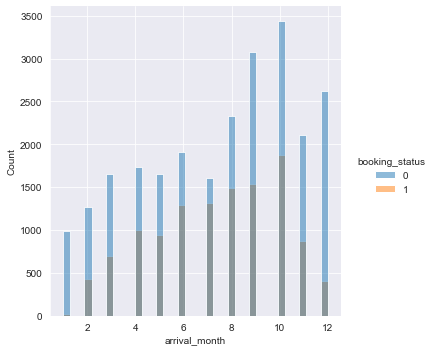

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(14, 5))
sns.displot(df, x="arrival_month", hue="booking_status")

The plot shows the count of bookings per month, for canceled and not-canceled status.

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

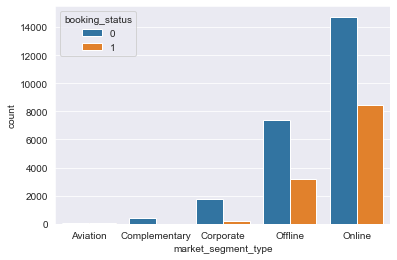

<IPython.core.display.Javascript object>

In [52]:
# Plot of market_segment_type vs booking_status
sns.countplot(data=df, x="market_segment_type", hue="booking_status")

The plot shows the count of bookings for various market segment types; and the corresponding booking status. Online is the market segment where most of the bookings happened.

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

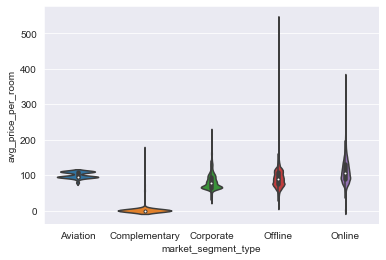

<IPython.core.display.Javascript object>

In [53]:
sns.violinplot(data=df, x="market_segment_type", y="avg_price_per_room")

In [54]:
# Code to find out mean avg price per room for each market segment type
df.groupby(df["market_segment_type"])["avg_price_per_room"].mean()

market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.63268
Online          112.25685
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

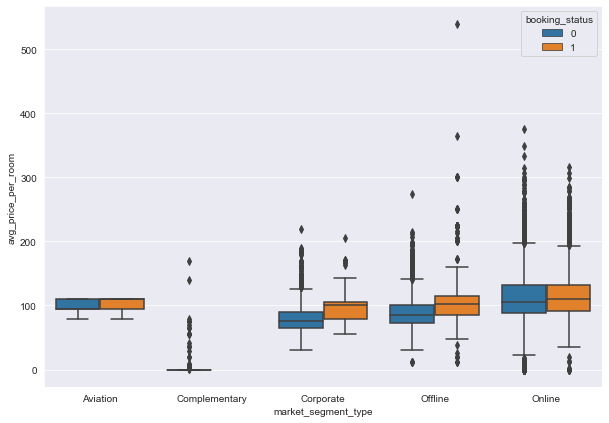

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", hue="booking_status"
)

The box plot shows the mean avg price per room for almost all the type of Market segments except Complementary is around 80 to 100 euros. There are certain outliers too hwoever. 

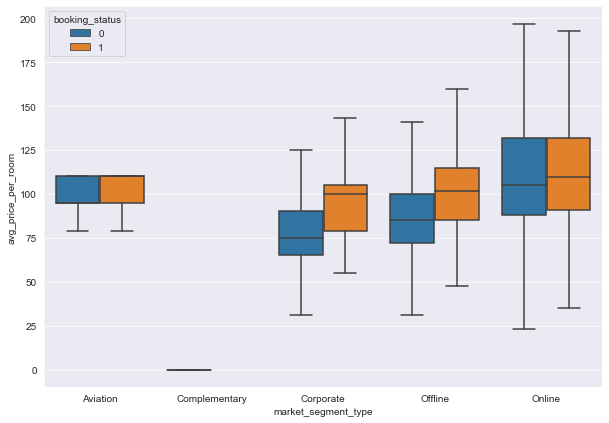

<IPython.core.display.Javascript object>

In [56]:
# lets see how avg price per room vary across different market segment types without outliers
plt.figure(figsize=(10, 7))
sns.boxplot(
    y="avg_price_per_room",
    x="market_segment_type",
    data=df,
    hue="booking_status",
    showfliers=False,
)
plt.show()

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

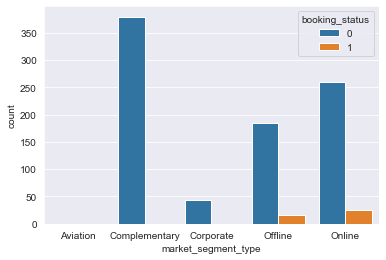

<IPython.core.display.Javascript object>

In [57]:
df_price_lt50 = df[(df["avg_price_per_room"] <= 50)]
sns.countplot(data=df_price_lt50, x="market_segment_type", hue="booking_status")

Majority of the bookings with avg price per room less than 50 is from Complementary market segment, followed by Online and Offline. Very less percentage of these got cancelled. 

In [58]:
# A new feature is derived based on the avg_price_per_room; tagging them as <100, 100-200, 200-300, 300 and above
df["price_range"] = pd.cut(
    x=df.avg_price_per_room,
    bins=[-np.infty, 100, 200, 300, np.infty],
    labels=["<100 euros", "100-200 euros", "200-300 euros", "300 euros and above"],
)

df["price_range"].value_counts()

<100 euros             18885
100-200 euros          16894
200-300 euros            487
300 euros and above        9
Name: price_range, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price_range', ylabel='count'>

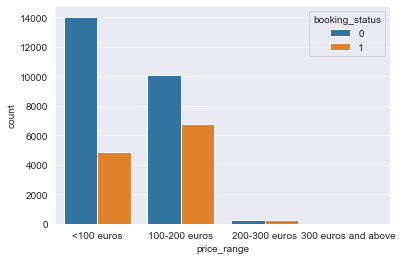

<IPython.core.display.Javascript object>

In [59]:
sns.countplot(data=df, x="price_range", hue="booking_status")

Bookings where avg price per room is in range of 100-200 euros, majority of the bookings got canceled compared to other ranges.

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

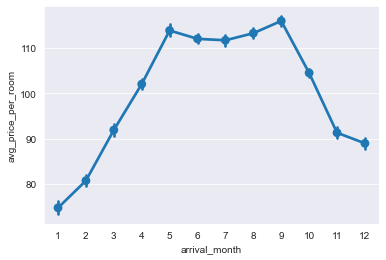

<IPython.core.display.Javascript object>

In [60]:
# Plot of arrival_month vs avg_price_per_room
sns.pointplot(data=df, x="arrival_month", y="avg_price_per_room")

In [61]:
df_yr2018 = df[(df["arrival_year"] == 2018)]
df_yr2017 = df[(df["arrival_year"] == 2017)]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

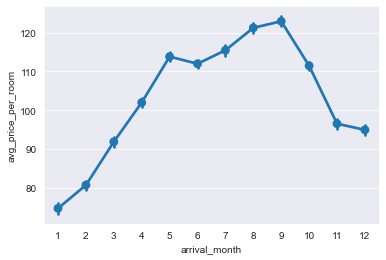

<IPython.core.display.Javascript object>

In [62]:
# Plot of arrival_month vs avg_price_per_room
sns.pointplot(data=df_yr2018, x="arrival_month", y="avg_price_per_room")

For the bookings from 2018, January has the least avg_price_per_room and it increased for almost each month and around September October is the highest price and then it dropped for the later months. One point to consider, the number of bookings were also more in October and due to that the avg of avg_price_per_room is also more for October.

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

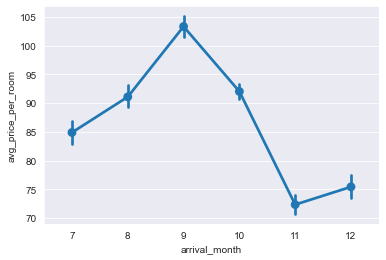

<IPython.core.display.Javascript object>

In [63]:
# Plot of arrival_month vs avg_price_per_room
sns.pointplot(data=df_yr2017, x="arrival_month", y="avg_price_per_room")

For the year 2017, we have data only from July till December; and in the bookings the highest avg_price_per_room is in September month; the least being in December. Again this could be because of the number of bookings in the corresponding months.

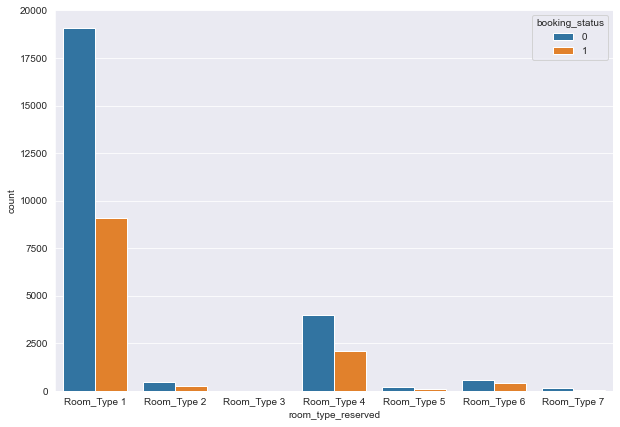

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x="room_type_reserved", hue="booking_status")
plt.show()

Room_type1 is the most booked type of room, and next is room_type4. Rest are all very less percentage of bookings. We do not have visibility on what amenties are provided for each type of room but majority picked the ROom type1. 

<AxesSubplot:xlabel='room_type_reserved', ylabel='avg_price_per_room'>

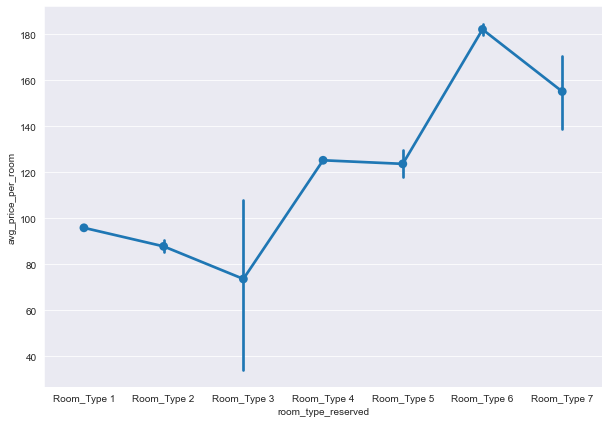

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(10, 7))
sns.pointplot(data=df, x="room_type_reserved", y="avg_price_per_room")

The plot shows that for ROom type1 the average room price is around 100 euros whereas for Room type6 it is around 180 euros. So probably Roomtype6 has more amenities comapred to other types.

<Figure size 720x504 with 0 Axes>

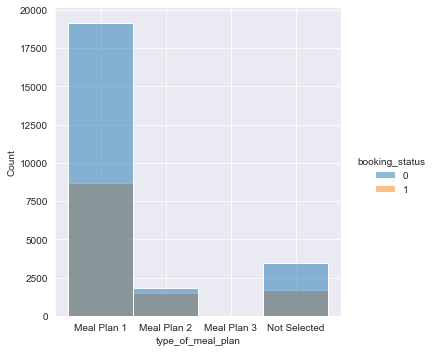

<IPython.core.display.Javascript object>

In [66]:
plt.figure(figsize=(10, 7))
sns.displot(data=df, x="type_of_meal_plan", hue="booking_status")

Meal_plan1 is breakfast, which is chosen by majority of the customers and meal_plan3 is the least chosen which is breakfast, lunch and dinner. It is obvious that not many people will choose this Full board option. There are some customers wo didnt choose any meal plan too. Of the 19K customers who picked meal plan1, around 8000 canceled their booking. Mealplan may not have any relation to the customer canceling their booking or not. 

In [67]:
df["repeated_guest"].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='repeated_guest', ylabel='count'>

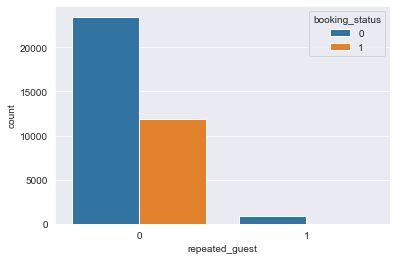

<IPython.core.display.Javascript object>

In [68]:
# Plot to show repeated guest vs booking status
sns.countplot(data=df, x="repeated_guest", hue="booking_status")

There are very less repeated guests in the data. Lets find out the booking status for the repeated guests.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

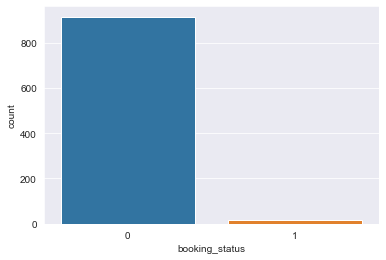

<IPython.core.display.Javascript object>

In [69]:
df_repeated_guests = df[(df["repeated_guest"] == 1)]
sns.countplot(data=df_repeated_guests, x="booking_status")

In [70]:
df_repeated_guests["booking_status"].value_counts()

0    914
1     16
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

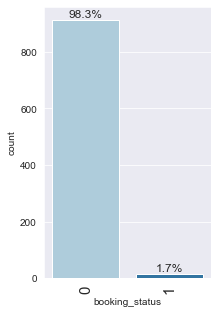

<IPython.core.display.Javascript object>

In [71]:
labeled_barplot(df_repeated_guests, "booking_status", perc=True)

Out of the bookings by customers who are repeated guests for the hotel, only 1.7% have canceled their booking. This is a good sign, the hotel is able to take care of their customers well and so majority of repeated guests are not canceling their book.

In [72]:
# Creating a dataframe for families, where no of children >0 and no of adults >1
df_families = df[(df["no_of_children"] > 0) & (df["no_of_adults"] > 1)]
df_families.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
60    INN00061             2               2                     0   
80    INN00081             2               2                     0   
95    INN00096             2               1                     0   
99    INN00100             2               2                     1   
114   INN00115             2               2                     2   

     no_of_week_nights type_of_meal_plan  required_car_parking_space  \
60                   1       Meal Plan 1                           1   
80                   2       Meal Plan 1                           0   
95                   2       Meal Plan 1                           1   
99                   3       Meal Plan 1                           0   
114                  2       Meal Plan 1                           0   

    room_type_reserved  lead_time  arrival_year  ...  arrival_date  \
60         Room_Type 6          2          2018  ...             2   
80         Room_Type 6         83          2018  ...             1   
95         Room_Type 1        134          2018  ...             4   
99         Room_Type 6         30          2018  ...            22   
114        Room_Type 2        116          2018  ...            26   

     market_segment_type repeated_guest  no_of_previous_cancellations  \
60                Online              0                             0   
80                Online              0                             0   
95                Online              0                             0   
99                Online              0                             0   
114               Online              0                             0   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
60                                      0           258.00000   
80                                      0           159.30000   
95                                      0           130.50000   
99                                      0           156.90000   
114                                     0           184.24000   

     no_of_special_requests  booking_status  lead_time_months    price_range  
60                        1               0                 0  200-300 euros  
80                        0               1                 2  100-200 euros  
95                        2               0                 4  100-200 euros  
99                        0               0                 1  100-200 euros  
114                       1               1                 3  100-200 euros  

[5 rows x 21 columns]

<IPython.core.display.Javascript object>

In [73]:
df_families["type_of_meal_plan"].value_counts()

Meal Plan 1     2165
Meal Plan 2      156
Not Selected      94
Meal Plan 3        0
Name: type_of_meal_plan, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

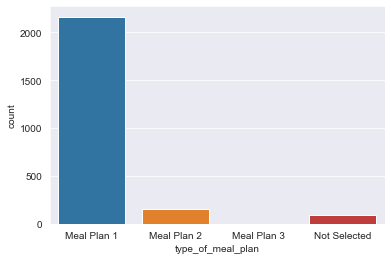

<IPython.core.display.Javascript object>

In [74]:
sns.countplot(data=df_families, x="type_of_meal_plan")

In [75]:
df_families["no_of_family_members"] = (
    df_families["no_of_adults"] + df_families["no_of_children"]
)

<IPython.core.display.Javascript object>

In [76]:
# Avg price of room for families
df_families["avg_price_per_room"].mean()

145.72088612836393

<IPython.core.display.Javascript object>

The mean of avg price per room, where no of adults and no of children is > 1; is 145 euros. 

<AxesSubplot:xlabel='avg_price_per_room'>

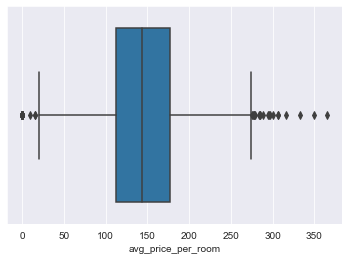

<IPython.core.display.Javascript object>

In [77]:
sns.boxplot(data=df_families, x="avg_price_per_room")

In [78]:
# Avg price of room for the entire dataset
df["avg_price_per_room"].mean()

103.4235390764958

<IPython.core.display.Javascript object>

The mean of avg price per room for all the bookings is 103 euros.

In [79]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


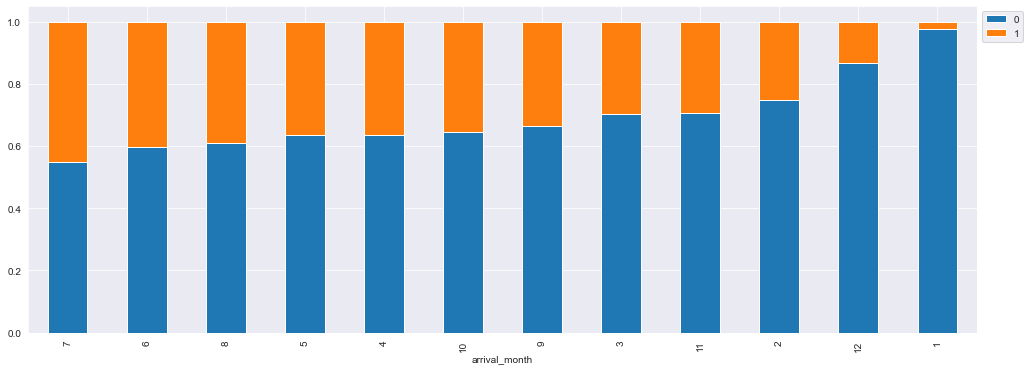

<IPython.core.display.Javascript object>

In [80]:
stacked_barplot(df, "arrival_month", "booking_status")

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


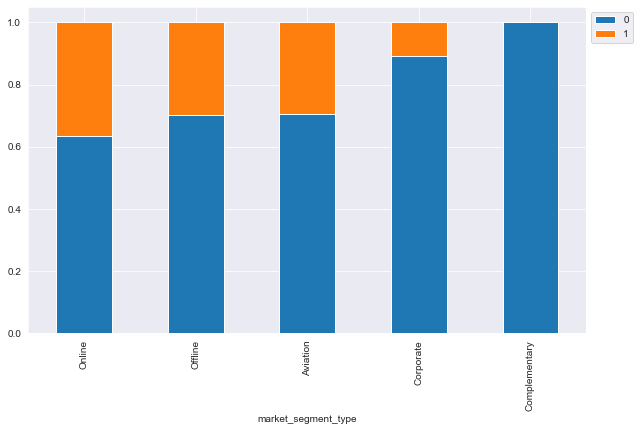

<IPython.core.display.Javascript object>

In [81]:
stacked_barplot(df, "market_segment_type", "booking_status")

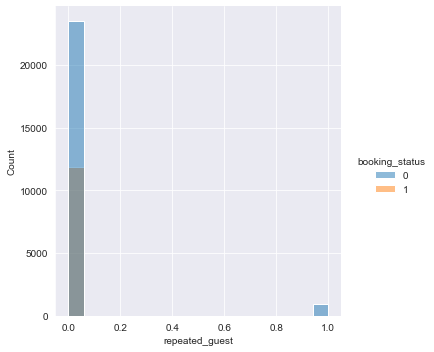

<IPython.core.display.Javascript object>

In [82]:
sns.displot(data=df, x="repeated_guest", hue="booking_status")

<AxesSubplot:xlabel='no_of_special_requests', ylabel='booking_status'>

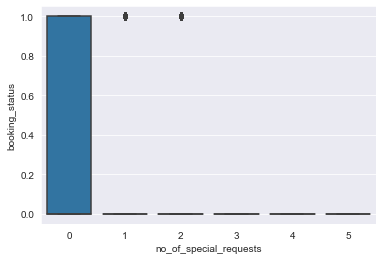

<IPython.core.display.Javascript object>

In [83]:
sns.boxplot(data=df, x="no_of_special_requests", y="booking_status")

The above plot shows that none of the bookings which had more than 2 special requests, got cancelled. 

In [84]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

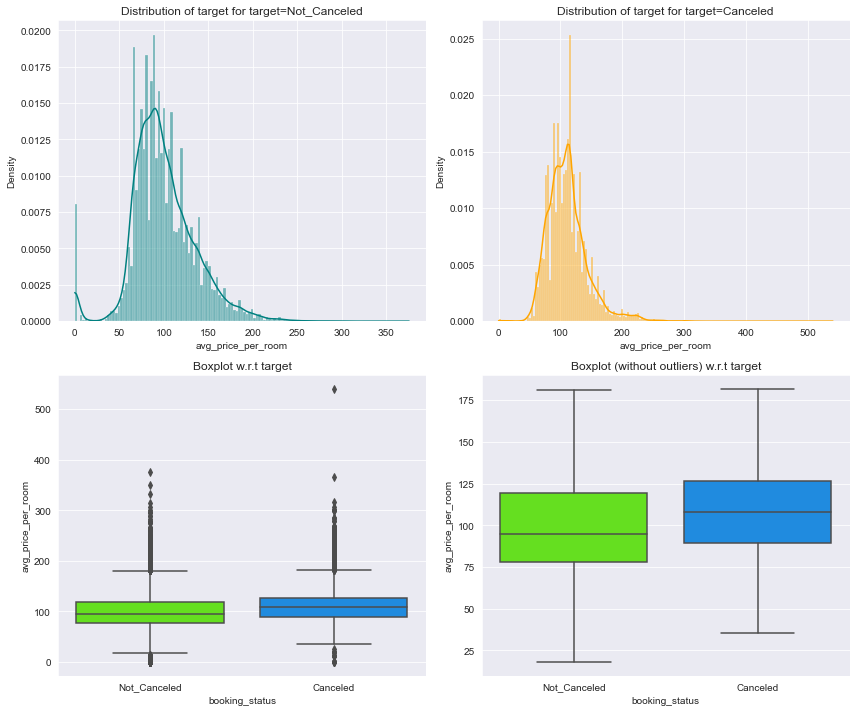

<IPython.core.display.Javascript object>

In [85]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

Avg price per room has an average value of 100 euros for both canceled and not canceled booking status.

Summary from EDA:

**Observations from EDA:**

***Univariate Analysis:***

* Booking status: 67% of the bookings are not canceled where as 33% got cancelled. This seems to be a huge share and does seem to impact the hotels profit. 
* Meal plan: Around 77% of the bookings chose Meal Plan 1 which is Breakfast and its a very neglibile % of bookings for Meal Plan 3.
* Room type: 77.5% of bookings chose Room_Type1 and a very negligible % of bookings chose Room_type3.
* Arrival year: 82% of data is from year 2018 and rest 18% is from 2017.
* Arrival month: Majority of the bookings happened for the month of October with 14.7% and next Septemebr with 12.7%. Least number of bookings for arrival month January with 2.8%. So October looks to be the busiest month for the INN hotels.
* Market segment type: 64% of the bookings are Online and least is 0.3% of the bookings are for Aviation. 
* No of previous cancellations: 99.1% of the bookings, didnt have any history of previous cancellations. One point to note here is, not many of the customers are repeated customers too and from the 1% previous cancellations; there are even as high as 11 and 13 times where the previous booking was cancelled.
* Required car parking space: 97% of the bookings didnt choose space for car parking. Only 3% bookings chose car parking space.
* Repeated guest: The data shows only 2.6% of the bookings are for repeated customers; rest 97.4% are new customers to this hotel.
* No of adults: The data shows that 72% of the bookings have 2 adults per room, a very minimal of 0.4% have 0 adults and even negligible number of bookings have 4 adults per room.
* No of children: The data shows 92.6% of the bookings do not have children, a very less percentage of bookings have 1,2 and 3 children per room. There are some bookings where the number of children are 9 and 10; these somehow look wierd to me because per my understanding Hotels would not allow more customers in the same room. These are outliers and will need to be treated before modelling.
* No of special requests: 54% bookings didnt have any special requests; 31% had 1 special request and so on..
* No of weekend nights: Many of the bookings have 0 weekend nights, so probably the customer has come for a business trip so for weekdays only. Values of 1 and 2 are close by and there is very less bookings for 4-7 weekend nights. These are however not outliers, because there is a good possibility that these are valid values.
* No of week nights: Highest number of the bookings are for 2 week nights. There are very less number of bookings for more than 7 week nights.
* Lead time: Lead time shows good number of varied data from 0 till as high as 450 days. Converting lead time to months; there are many bookings which are done just within a month lead time. But surprisingly there are many bookings which were done more than 10 months lead time. We can check further if these were canceled or not.
* Avg price per room: Avg price of the room is concentrated more around ~ 50 to ~ 200 euros. There are some bookings where price of the room is 0 and as low as < ~ 50 euros; probably these are some complementary bookings. We could cehck these further too.  However some with ~ 350- ~ 500 euros too.

***Bivariate and Multivariate Analysis:***
* Booking status vs lead time: Majority of the bookings are within 1 months lead time and most of them were not canceled. The bookings percentage with highest lead time looks more canceled. 
Out of the 11890 bookings with lead time > 100, 6900 odd bookings got canceled. There could be many unavoidable circurmstances that might arrive, because of which the plan wouldnt work out and customer might be cancelling the booking that they booked well ahead.
* Booking status vs arrival_month: For the month of October, there were highest total number of bookings. October also has the maximum number of canceled bookings. 
* Market segment type vs booking status: Compariso of count of bookings for various market segment types; and the corresponding booking status shows that Online is the market segment where most of the bookings happened. And that is where majority of the cancellations also happened.
* Avg price per room vs arrival month: For the bookings from 2018, January has the least avg_price_per_room and it increased for almost each month and around September October is the highest price and then it dropped for the later months. One point to consider, the number of bookings were also more in October and due to that the avg of avg_price_per_room is also more for October. For the year 2017, we have data only from July till December; and in the bookings the highest avg_price_per_room is in September month; the least being in December. Again this could be because of the number of bookings in the corresponding months.
* Room_type1 is the most booked type of room, and next is room_type4. Rest are all very less percentage of bookings. We do not have visibility on what amenties are provided for each type of room but majority picked the ROom type1. 
* Meal plan vs booking status: Meal_plan1 is breakfast, which is chosen by majority of the customers and meal_plan3 is the least chosen which is breakfast, lunch and dinner. It is obvious that not many people will choose this Full board option. There are some customers wo didnt choose any meal plan too. Of the 19K customers who picked meal plan1, around 8000 canceled their booking. Mealplan may not have any relation to the customer canceling their booking or not. It is just giving their preference.
* Market segment type vs avg price per room: The mean avg price per room for almost all the type of Market segments except Complementary is around 80 to 100 euros. There are certain outliers too hwoever. 
* Repeated guest vs booking stats: Out of the customers who are repeated guests for the hotel, only 1.7% have canceled their booking. This is a good sign, the hotel is able to take care of their customers well and so majority of repeated guests are not canceling their book.
* Avg price per room < 50 vs market segment type vs booking status: Majority of the bookings with avg price per room less than 50 is from Complementary market segment, followed by Online and Offline. Very less percentage of these got cancelled. 
* no of special requests vs booking status: None of the bookings which had more than 2 special requests, got cancelled. 

** Bookings where avg price per room is in range of 100-200 euros, majority of the bookings got canceled compared to other ranges.

** The mean of avg price per room for all the bookings is 103 euros. Whereas the mean of avg price per room, where no of adults and no of children is > 1; is 145 euros. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [86]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
lead_time_months                        0
price_range                             0
dtype: int64

<IPython.core.display.Javascript object>

There is no missing values in the dataframe

### Outlier Detection

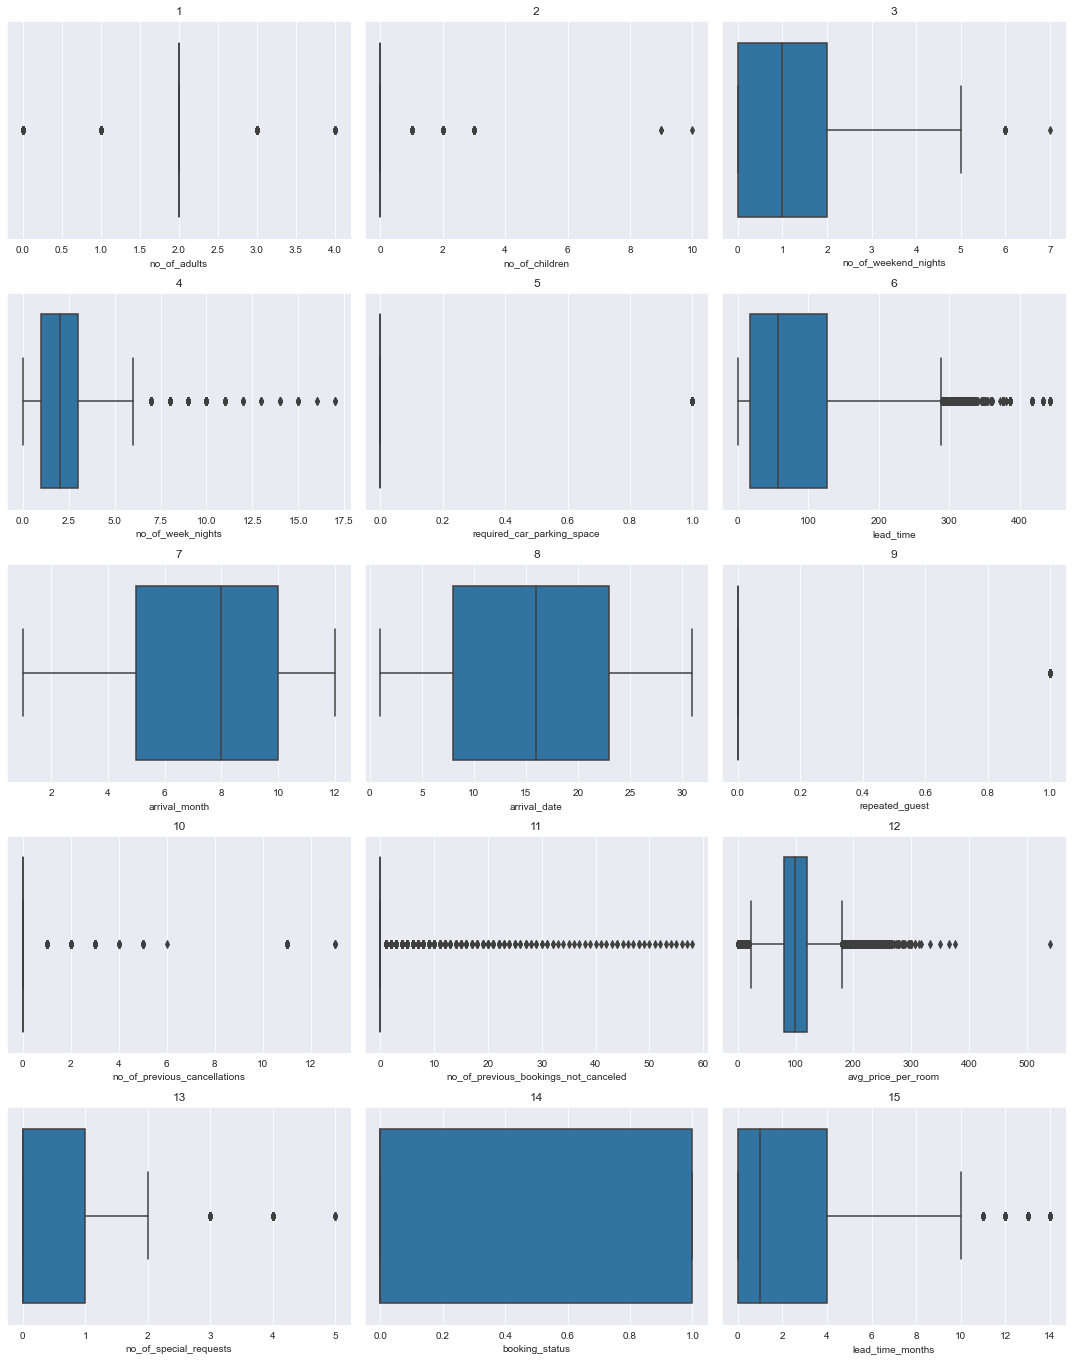

<IPython.core.display.Javascript object>

In [87]:
# Detecting outliers in the data using boxplot
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping arrival_year as it is a temporal variable
cols_list.remove("arrival_year")
plt.figure(figsize=(15, 45))

# for i, variable in enumerate(cols_list):
for i in range(len(cols_list)):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(data=df, x=cols_list[i])  # , kde=True)
    #    cols_list.plot(kind='box',subplots=False, ax=axis)
    plt.tight_layout()
    plt.title(i + 1)
plt.show()

In [88]:
df["no_of_children"].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

no_of_children 9 and 10 seems outliers, so replacing these with the maximum number of children from the dataset, 3.

In [89]:
# replacing 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

In [90]:
# Identified couple of rows where no of week nights and no of weekend nights is 0; which doesnt seem valid data.
df[(df["no_of_week_nights"] == 0) & (df["no_of_weekend_nights"] == 0)].shape

(78, 21)

<IPython.core.display.Javascript object>

In [91]:
# Writing these records to a dataframe for analysis
df_zerodays = df[(df["no_of_week_nights"] == 0) & (df["no_of_weekend_nights"] == 0)]

<IPython.core.display.Javascript object>

In [92]:
df_zerodays["booking_status"].value_counts()

0    76
1     2
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

So out of these 78 rows, there are 76 bookings which are not canceled but 2 were. These are very less percentage from the whole dataset, so ignoring for now. But in ideal scenario, it would be good idea to check with Business about this.

## EDA

- It is a good idea to explore the data once again after manipulating it.

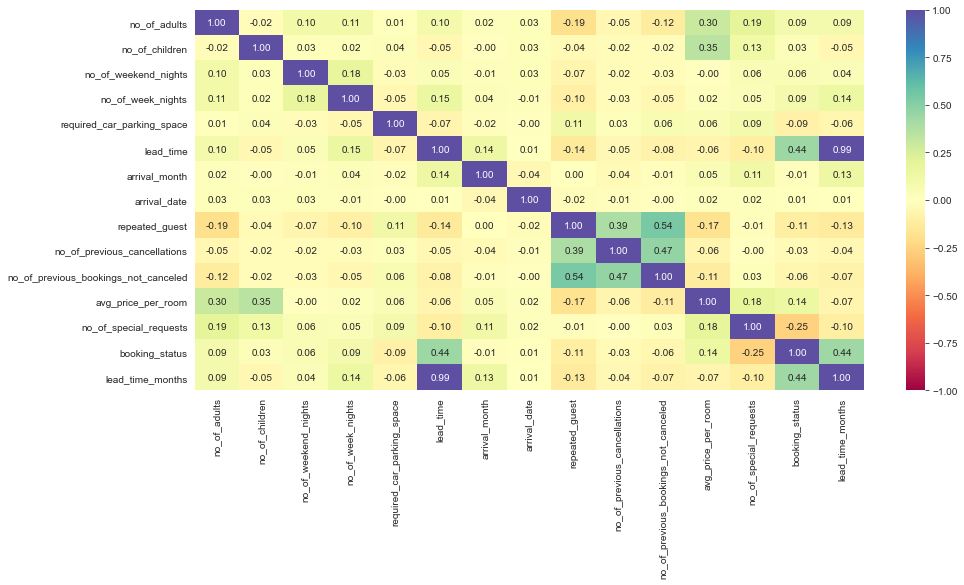

<IPython.core.display.Javascript object>

In [93]:
# Heatmap to display correlation on the attributes against each other
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("arrival_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Building a Logistic Regression model

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  object  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

<IPython.core.display.Javascript object>

In [95]:
X = df.drop(["booking_status", "Booking_ID", "lead_time_months", "price_range"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [96]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

## Model performance evaluation

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a booking can be cancelled but in reality the booking doesnt get cancelled.
2. Predicting a booking doesn't get cancelled but in reality the booking gets cancelled.

### Which case is more important? 
* Both the cases are important as:

* If we predict a booking can be cancelled but actually the booking is not cancelled, it would be difficult for the hotel to manage when the guests arrive.

* If we predict a booking doesn't get cancelled but actually the booking is cancelled; there would be loss of revenue for the hotel.


### How to reduce this loss?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [98]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [99]:
X = df.drop(["booking_status", "Booking_ID", "lead_time_months", "price_range"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [100]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:                  0.3322
Time:                        22:52:36   Log-Likelihood:                -10725.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -887.4507    121.336     -7.314      0.000   -1125.266    -649.636
no_of_adults                             0.0322      

/Users/kalyanialuru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<IPython.core.display.Javascript object>

## Model performance evaluation

In [101]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80679 0.63277    0.73985 0.68213

<IPython.core.display.Javascript object>

### Checking for MultiCollinearity

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [103]:
checking_vif(X_train)

feature            VIF
0                                  const 39598889.20491
1                           no_of_adults        1.34673
2                         no_of_children        2.08767
3                   no_of_weekend_nights        1.06731
4                      no_of_week_nights        1.09435
5             required_car_parking_space        1.03494
6                              lead_time        1.40191
7                           arrival_year        1.43339
8                          arrival_month        1.27735
9                           arrival_date        1.00770
10                        repeated_guest        1.75020
11          no_of_previous_cancellations        1.32201
12  no_of_previous_bookings_not_canceled        1.57088
13                    avg_price_per_room        2.03656
14                no_of_special_requests        1.24763
15         type_of_meal_plan_Meal Plan 2        1.26187
16         type_of_meal_plan_Meal Plan 3        1.00797
17        type_of_meal_plan_Not Selected        1.27961
18        room_type_reserved_Room_Type 2        1.09646
19        room_type_reserved_Room_Type 3        1.00390
20        room_type_reserved_Room_Type 4        1.35674
21        room_type_reserved_Room_Type 5        1.03093
22        room_type_reserved_Room_Type 6        2.04666
23        room_type_reserved_Room_Type 7        1.09361
24     market_segment_type_Complementary        4.35043
25         market_segment_type_Corporate       16.63445
26           market_segment_type_Offline       62.51385
27            market_segment_type_Online       69.47393

<IPython.core.display.Javascript object>

market_segment variables have VIF >5, but these are part of Dummies from 'market_segment' column.
Removing some of the dummies doesnt make sense when they are part of a categorical column, so not dropping them.

***High p-values treatment***

In [104]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/Users/kalyanialuru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [105]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [106]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.422990
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:                  0.3312
Time:                        22:52:38   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.8889    120.911     -7.194    

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train1* as the final ones and *lg1* as final model.**

### Coefficient interpretations

* Coefficient of no_of_weekend_nights, no_of_week_nights, arrival_year, lead_time, no_of_previous_cancellations, avg_price_per_room, type_of_meal plans are positive. So an increase in these will lead to increase in chances of a booking to be canceled.

* Coefficient of levels of Room_type, market_segments, no_of_special_rqeuest, repeated_guest, required_car_parking_space, arrival_month are negative. An increase in these will lead to decrease in chances of a booking to be canceled.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [107]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_weekend_nights  no_of_week_nights  \
Odds           0.00000               1.16163            1.03686   
Change_odd% -100.00000              16.16282            3.68572   

             required_car_parking_space  lead_time  arrival_year  \
Odds                            0.19893    1.01601       1.53690   
Change_odd%                   -80.10671    1.60144      53.69000   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.95202         0.04620                       1.33534   
Change_odd%       -4.79758       -95.37970                      33.53397   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.01923                 0.22639   
Change_odd%             1.92270               -77.36112   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                               1.18160                         1.23349   
Change_odd%                       18.15955                        23.34870   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                                0.68837                         0.76503   
Change_odd%                       -31.16329                       -23.49673   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                                0.50261                         0.47622   
Change_odd%                       -49.73868                       -52.37831   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                                0.26847                        0.41852   
Change_odd%                       -73.15301                      -58.14827   

             market_segment_type_Offline  
Odds                             0.16991  
Change_odd%                    -83.00891

<IPython.core.display.Javascript object>

### Coefficient interpretations

* `lead_time`: Holding all other features constant a 1 unit change in the lead_time will increase the odds of a booking to be canceled by 1.016 times or a 1.6% increase in odds of having a booking canceled.
* `avg_price_per_room': Holding all other features constant a 1 unit change in the avg_price_per_room will increase the odds of a booking to be canceled by 1.019 times or a 1.9% increase in odds of having a booking canceled.
* The odds of a Corporate booking to be canceled is 0.42 times less than the booking whose market segment type is Aviation or Complementary or Online; or 58.15% fewer odds of Corporate booking getting cancelled. Similarly, the odds of a booking who has a market segment type Offline is 0.17 times less than the booking where market segment type is Aivation or Complementary or Online;  or 83% less odds of having a booking getting cancelled. [keeping  market_segment_type category as a reference].
* The odds of a booking of a repeated guest to be cancelled is 0.046 times less; or 95.38% fewer odds of a booking to be cancelled.
* There is 1.3% more odds for a booking to get cancelled, that of a customer who cancelled previously bookings; or 33% increase in odds of a booking to get cancelled.
* Holding all other features constant a 1 unit change in no of weekend nights will increase the odds of a booking to be cancelled by 1.16 times or there is a 16% increase in odds of having a booking to be canceled. Similarly there is 3.7% increase in odds of having a booking to be canceled, for increase in no of week nights. 

#### Checking model performance on the training set

In [108]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80659 0.63253    0.73946 0.68183

<IPython.core.display.Javascript object>

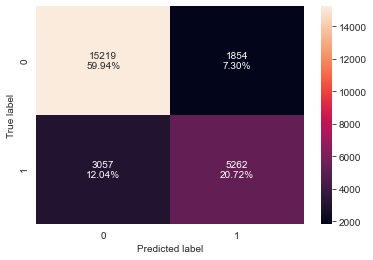

<IPython.core.display.Javascript object>

In [109]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [110]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80659 0.63253    0.73946 0.68183

<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

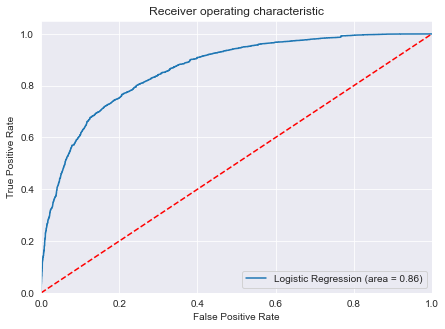

<IPython.core.display.Javascript object>

In [111]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [112]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.33295719173915095


<IPython.core.display.Javascript object>

#### Checking model performance on training set

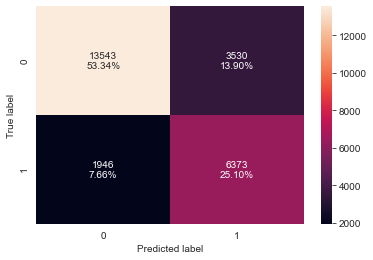

<IPython.core.display.Javascript object>

In [113]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [114]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.78434 0.76608    0.64354 0.69948

<IPython.core.display.Javascript object>

#### Let's use Precision-Recall curve and see if we can find a better threshold

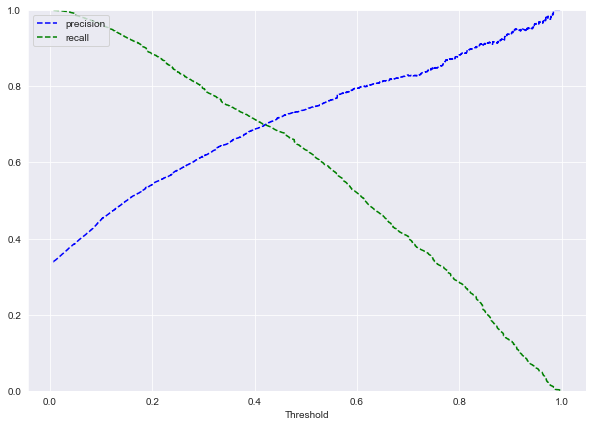

<IPython.core.display.Javascript object>

In [115]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [116]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

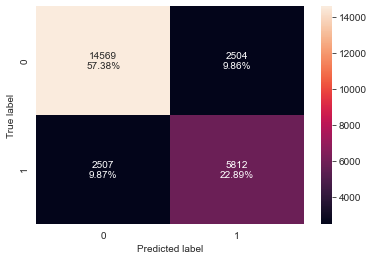

<IPython.core.display.Javascript object>

In [117]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [118]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80265 0.69864    0.69889 0.69877

<IPython.core.display.Javascript object>

### Model Performance Summary

In [119]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80659   
Recall                                         0.63253   
Precision                                      0.73946   
F1                                             0.68183   

           Logistic Regression-0.33 Threshold  \
Accuracy                              0.78434   
Recall                                0.76608   
Precision                             0.64354   
F1                                    0.69948   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80265  
Recall                                0.69864  
Precision                             0.69889  
F1                                    0.69877

<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [120]:
X_test1 = X_test[list(X_train1.columns)]

<IPython.core.display.Javascript object>

**Using model with default threshold**

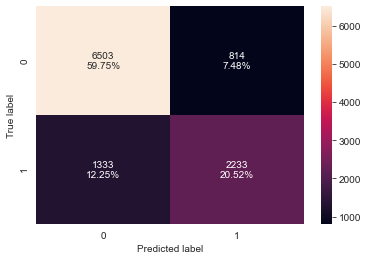

<IPython.core.display.Javascript object>

In [121]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [122]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80272 0.62619    0.73285 0.67534

<IPython.core.display.Javascript object>

* ROC curve on test set

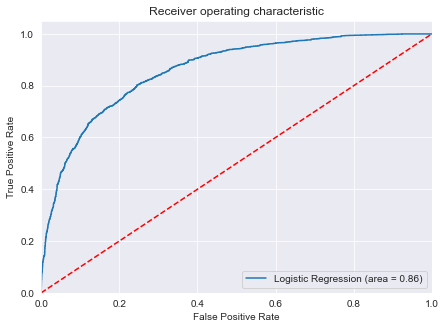

<IPython.core.display.Javascript object>

In [123]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.33** 

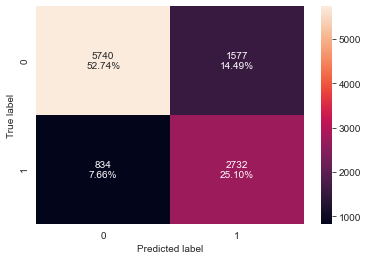

<IPython.core.display.Javascript object>

In [124]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [125]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.77846 0.76612    0.63402 0.69384

<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

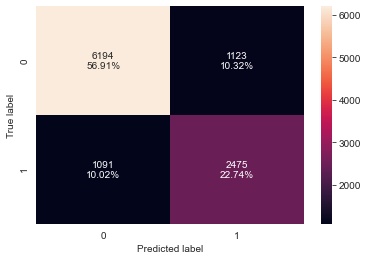

<IPython.core.display.Javascript object>

In [126]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [127]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.79656 0.69405    0.68788 0.69095

<IPython.core.display.Javascript object>

### Model performance summary


In [128]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80659   
Recall                                         0.63253   
Precision                                      0.73946   
F1                                             0.68183   

           Logistic Regression-0.33 Threshold  \
Accuracy                              0.78434   
Recall                                0.76608   
Precision                             0.64354   
F1                                    0.69948   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80265  
Recall                                0.69864  
Precision                             0.69889  
F1                                    0.69877

<IPython.core.display.Javascript object>

In [129]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80272   
Recall                                         0.62619   
Precision                                      0.73285   
F1                                             0.67534   

           Logistic Regression-0.33 Threshold  \
Accuracy                              0.77846   
Recall                                0.76612   
Precision                             0.63402   
F1                                    0.69384   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79656  
Recall                                0.69405  
Precision                             0.68788  
F1                                    0.69095

<IPython.core.display.Javascript object>

### Conclusion
* We have been able to build a predictive model that can be used by the INN hotels to find the customers who would cancel the booking with an f1_score of 0.69 on the training  and testing set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of no_of_weekend_nights, no_of_week_nights, arrival_year, lead_time, no_of_previous_cancellations, avg_price_per_room, type_of_meal plans are positive. So an increase in these will lead to increase in chances of a booking to be canceled.

* Coefficient of levels of Room_type, market_segments, no_of_special_rqeuest, repeated_guest, required_car_parking_space, arrival_month are negative. An increase in these will lead to decrease in chances of a booking to be canceled.

## Recommendations

* The odds of a booking to get cancelled is more if the lead time is more, it is very understandable that customers who booked very early like more than 6 months ahead may have other committments or change in plans and could cancel the booking of the hotel. INN hotels could keep a watch on such early bookings and contact customers for an identifying an early chance of cancellation too. THat way they could open that booking for another customer and not lose their revenue. 
* The average price per room also is a factor of the booking to get cancelled, so the INN hotels could keep a continuous watch on their prices with the market rates and adjust them accordingly to save such bookings.  
* A repeated customer is very likely not to cancel their booking, so INN hotels management could do some repeated customer recognition and offer coupons to encourage them. 
The percentage of repeated customer is very less, so they could offer a discount within budget for the customers next visit. 
* Corporate and Offline bookings are less likely to get cancelled compared to other market type segments. So INN hotels could try to concentrate on attracting Online booking customer as they contribute to much of the revenue for the hotels. 
* Customers who cancelled previous booking, are likely to cancel the current booking too. As per the Logistic model there is a 33% increase in odds pertaining this feature. So INN hotels management can reach out to customer who cancel their booking and understand the reasons of cancellation. They could accordingly offer some price discounts or provide good ameneties for the next booking to not get cancelled. 

## Building a Decision Tree model

***Preparning the data***

In [130]:
X = df.drop(["booking_status", "Booking_ID", "lead_time_months", "price_range"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [131]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a booking will get cancelled but in reality the booking doesnt get cancelled.

2. Predicting a booking would not get cancelled but in reality the booking got cancelled.

### Which case is more important? 

* Both the cases are important in this scenario.

### How to reduce this loss i.e need to reduce False Negatives?
*  `F-score` should be maximized, the greater the f-score higher the chances of minimizing the false negatives and false positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [132]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [133]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* Here in this case, we have frequency as 67 vs 33 % so not specifying any weight for each class.

* class_weight is a hyperparameter for the decision tree classifier.

In [134]:
# model = DecisionTreeClassifier(criterion="gini", random_state=1)
model = DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [135]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

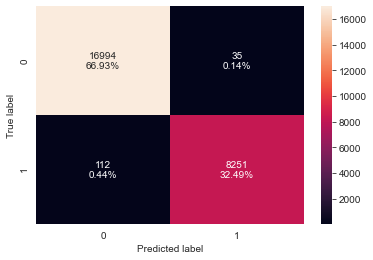

<IPython.core.display.Javascript object>

In [136]:
confusion_matrix_sklearn(model, X_train, y_train)

In [137]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)

print("Decision Tree Performance on Training dataset")
print(decision_tree_perf_train)

Decision Tree Performance on Training dataset
   Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117


<IPython.core.display.Javascript object>

* Model is able to perfectly classify almost all the data points on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

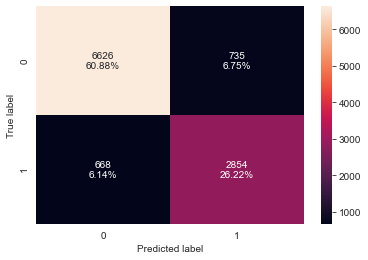

<IPython.core.display.Javascript object>

In [138]:
confusion_matrix_sklearn(model, X_test, y_test)

In [139]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)

print("Decision Tree Performance on Testing dataset")
print(decision_tree_perf_test)

Decision Tree Performance on Testing dataset
   Accuracy  Recall  Precision      F1
0   0.87108 0.81034    0.79521 0.80270


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

In [140]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

In [141]:
model.get_depth()

38

<IPython.core.display.Javascript object>

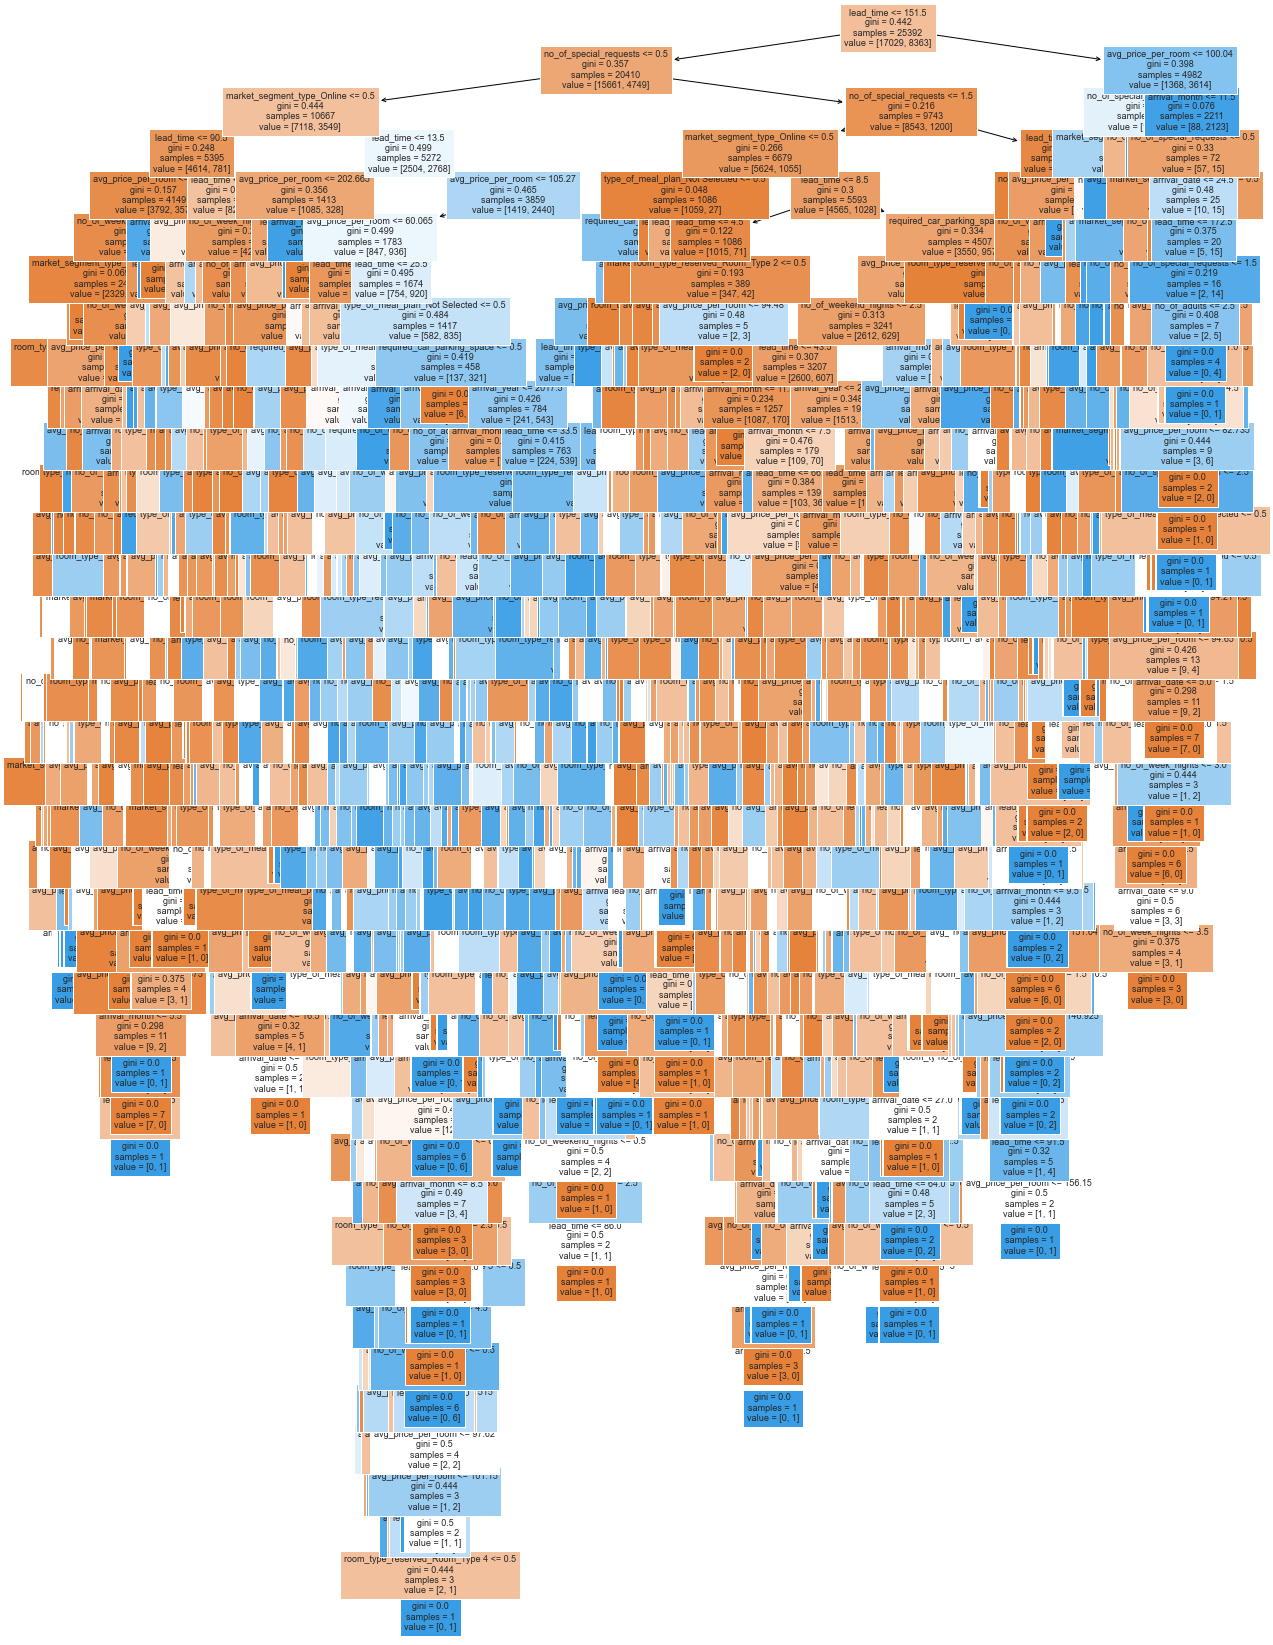

<IPython.core.display.Javascript object>

In [142]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [143]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

<IPython.core.display.Javascript object>

In [144]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.35035
avg_price_per_room                   0.17727
market_segment_type_Online           0.09234
arrival_date                         0.08526
no_of_special_requests               0.06795
arrival_month                        0.06457
no_of_week_nights                    0.04539
no_of_weekend_nights                 0.03853
no_of_adults                         0.02748
arrival_year                         0.01179
type_of_meal_plan_Not Selected       0.00823
room_type_reserved_Room_Type 4       0.00690
required_car_parking_space           0.00688
market_segment_type_Offline          0.00393
type_of_meal_plan_Meal Plan 2        0.00370
no_of_children                       0.00367
room_type_reserved_Room_Type 5       0.00168
room_type_reserved_Room_Type 2       0.00149
market_segment_type_Corporate        0.00065
repeated_guest                       0.00060
room_type_reserved_Room_Type 6       0.00058
room_type_

<IPython.core.display.Javascript object>

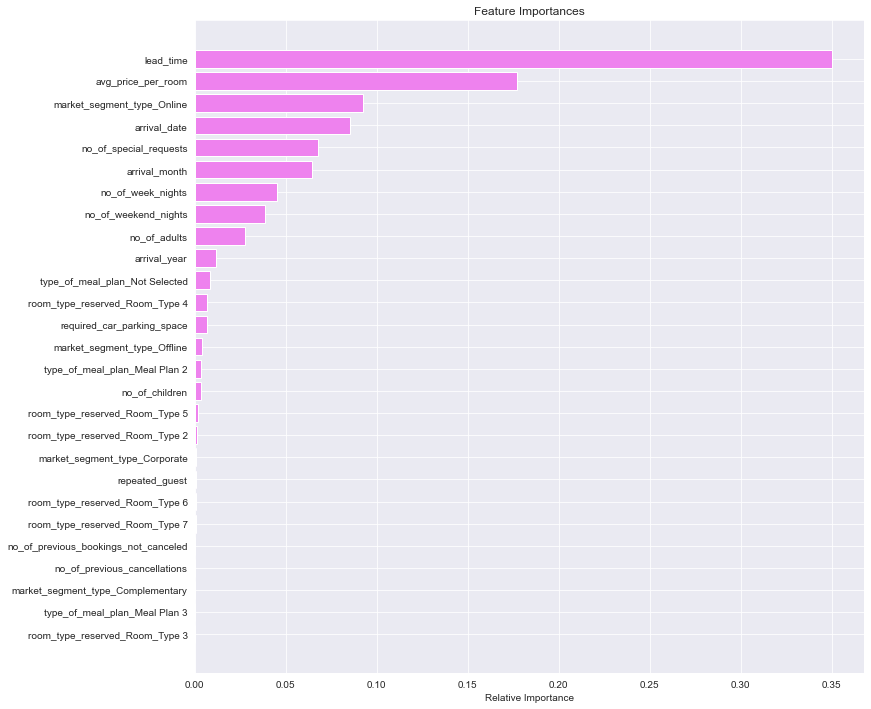

<IPython.core.display.Javascript object>

In [145]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, leadtime is the most important variable for predicting the booking_status.

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [146]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 20, 30, 40, 50, 60, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

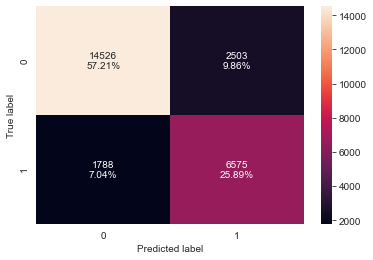

<IPython.core.display.Javascript object>

In [147]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [148]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)

print("Decision Tree Performance on Training dataset")
print(decision_tree_tune_perf_train)

Decision Tree Performance on Training dataset
   Accuracy  Recall  Precision      F1
0   0.83101 0.78620    0.72428 0.75397


<IPython.core.display.Javascript object>

#### Checking performance on test set

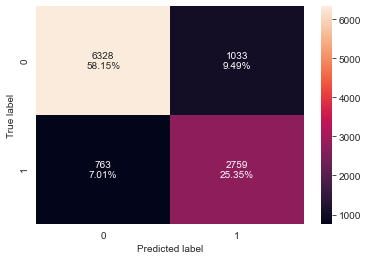

<IPython.core.display.Javascript object>

In [149]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [150]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

print("Decision Tree Performance on Testing dataset")
print(decision_tree_tune_perf_test)

Decision Tree Performance on Testing dataset
   Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444


<IPython.core.display.Javascript object>

## Visualizing the Decision Tree

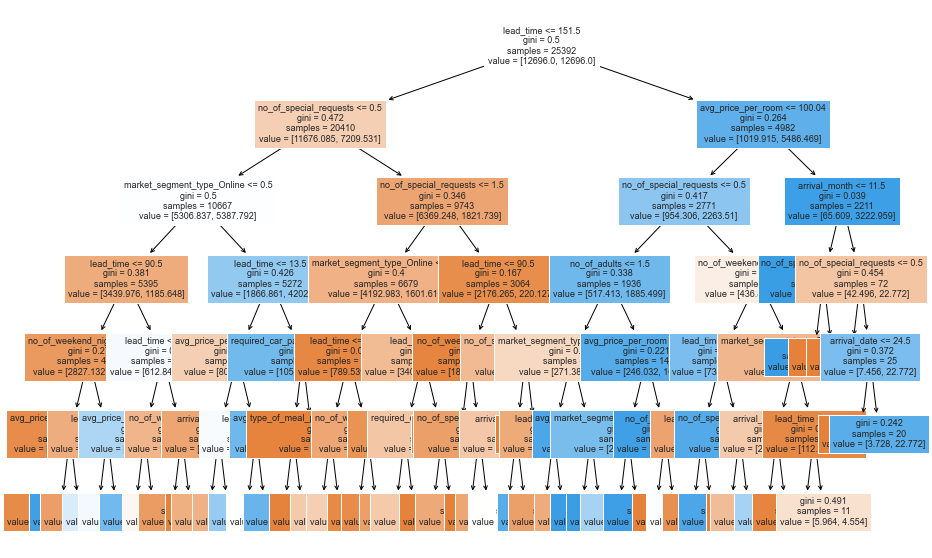

<IPython.core.display.Javascript object>

In [151]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [152]:
estimator.get_depth()

6

<IPython.core.display.Javascript object>

In [153]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the leadtime of the booking is less than or equal to 151.50 days and there is no special requests and market segment type is not Online and when lead time is less than 90 days and there is no weekend nights in the booking and avg price per room is less than 196 euros the booking will not get cancelled. But if the avg price per room is greater than 195 euros the booking could get cancelled.

`Interpretations from other decision rules can be made similarly`

In [154]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.47555
market_segment_type_Online           0.18460
no_of_special_requests               0.16918
avg_price_per_room                   0.07623
no_of_adults                         0.02692
no_of_weekend_nights                 0.02059
arrival_month                        0.01412
required_car_parking_space           0.01410
market_segment_type_Offline          0.01001
no_of_week_nights                    0.00700
type_of_meal_plan_Not Selected       0.00095
arrival_date                         0.00076
no_of_previous_cancellations         0.00000
room_type_reserved_Room_Type 5       0.00000
arrival_year                         0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 3       0.00000
room_type_reserved_Room_Type 4       0.00000
no_of_prev

<IPython.core.display.Javascript object>

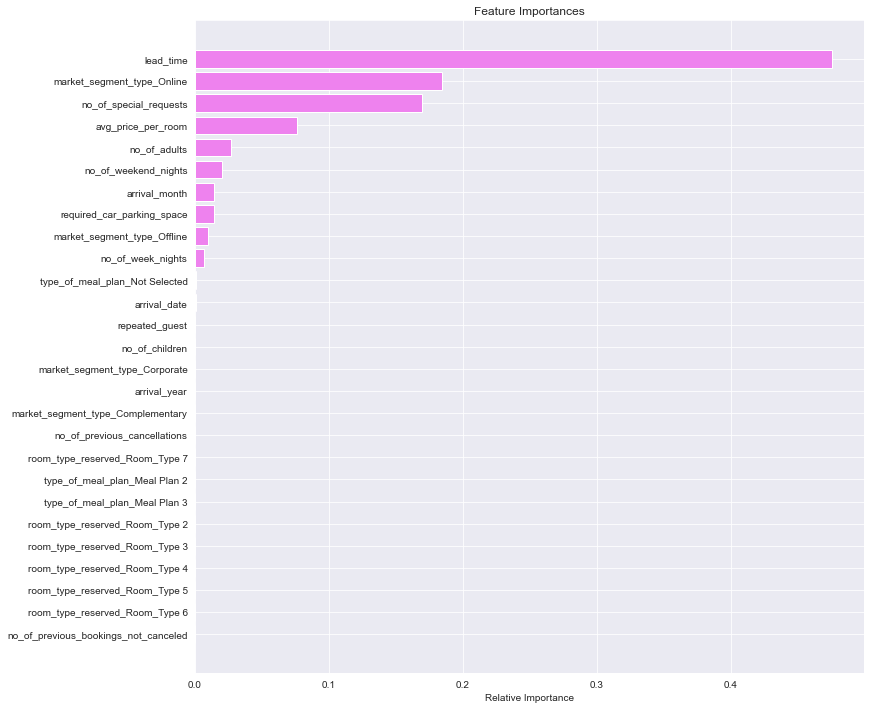

<IPython.core.display.Javascript object>

In [155]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree leadtime is the most important feature followed by market_segment_type_Online.

## Cost Complexity Pruning

In [156]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [157]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1899     0.00890     0.32806
1900     0.00980     0.33786
1901     0.01272     0.35058
1902     0.03412     0.41882
1903     0.08118     0.50000

[1904 rows x 2 columns]

<IPython.core.display.Javascript object>

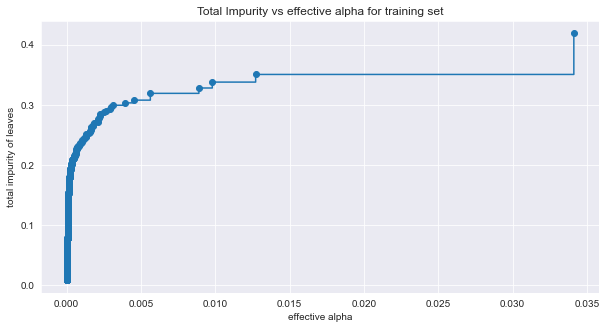

<IPython.core.display.Javascript object>

In [158]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [159]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

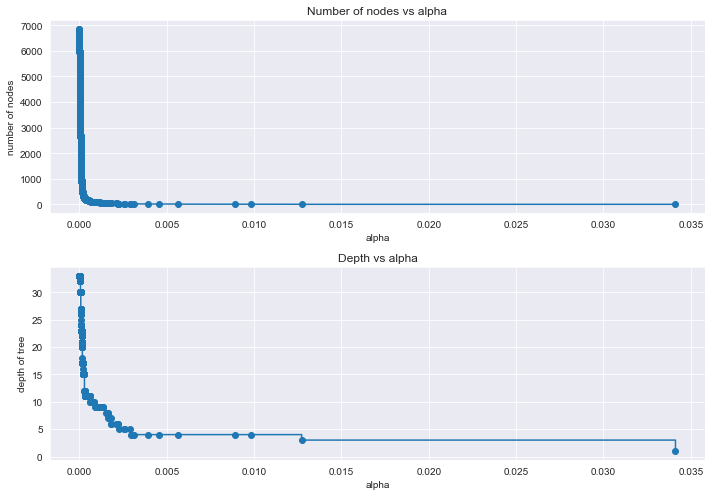

<IPython.core.display.Javascript object>

In [160]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [161]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

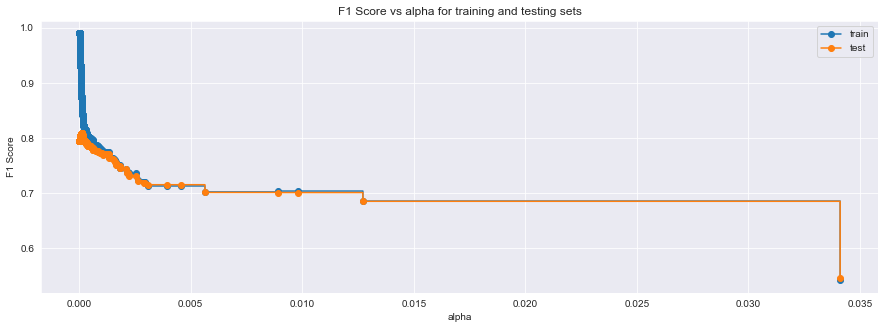

<IPython.core.display.Javascript object>

In [162]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [163]:
index_best_model = np.argmax(f1_test)
print(index_best_model)
best_model = clfs[index_best_model]
print(best_model)

1666
DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

In [164]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

#### checking performance on training set

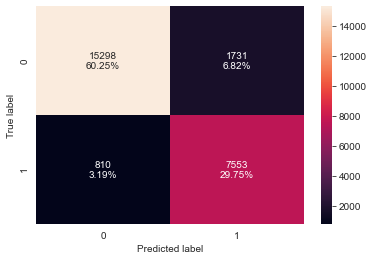

<IPython.core.display.Javascript object>

In [165]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [166]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)

print("Decision Tree Performance on Training dataset")
print(decision_tree_post_perf_train)

Decision Tree Performance on Training dataset
   Accuracy  Recall  Precision      F1
0   0.89993 0.90314    0.81355 0.85601


<IPython.core.display.Javascript object>

#### checking performance on test set

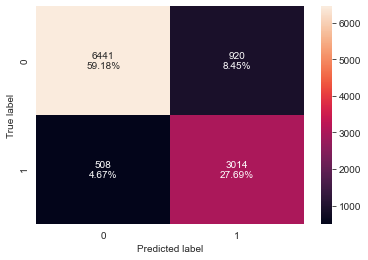

<IPython.core.display.Javascript object>

In [167]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [168]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)

print("Decision Tree Performance on Testing dataset")
print(decision_tree_post_perf_test)

Decision Tree Performance on Testing dataset
   Accuracy  Recall  Precision      F1
0   0.86879 0.85576    0.76614 0.80848


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

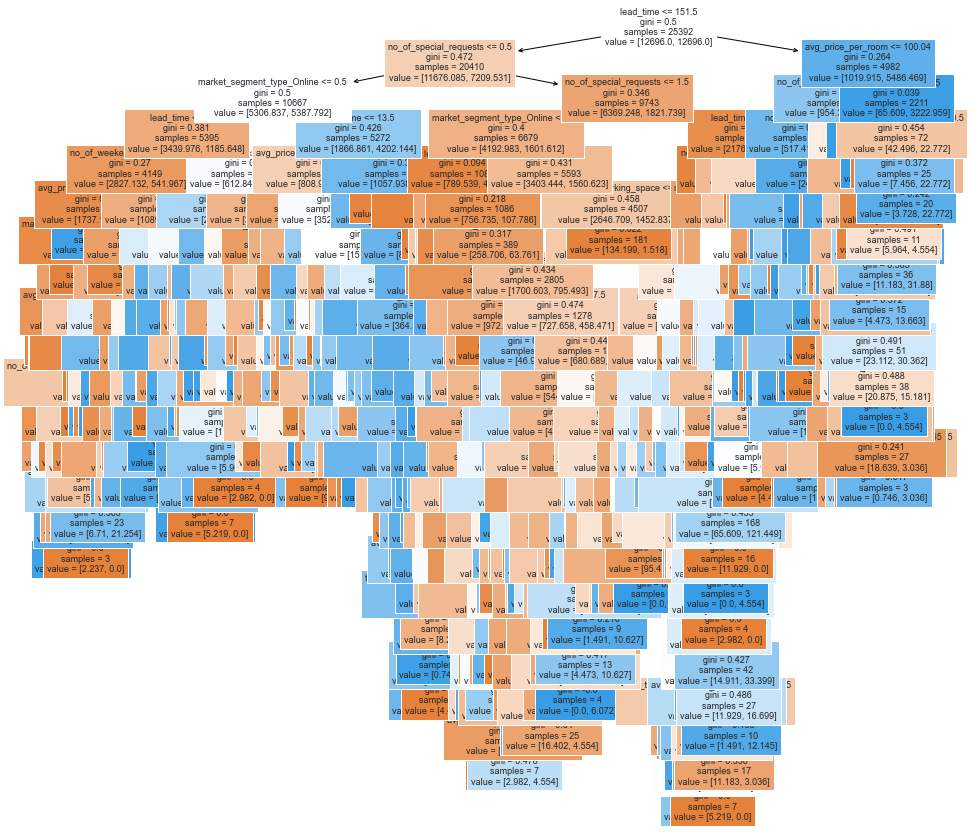

<IPython.core.display.Javascript object>

In [169]:
plt.figure(figsize=(15, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [170]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

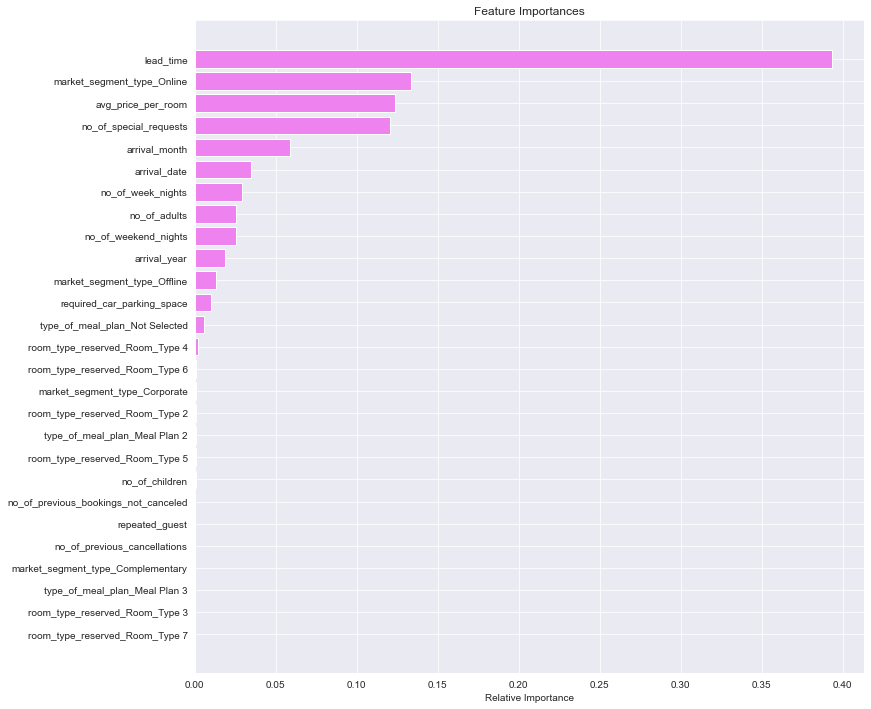

<IPython.core.display.Javascript object>

In [171]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

lead_time and market_segment_type_Online are the most important features even for the post pruned tree.

In [172]:
best_model.get_depth()

22

<IPython.core.display.Javascript object>

## Model Performance Comparison and Conclusions

In [173]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83101   
Recall                   0.98661                      0.78620   
Precision                0.99578                      0.72428   
F1                       0.99117                      0.75397   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89993  
Recall                          0.90314  
Precision                       0.81355  
F1                              0.85601

<IPython.core.display.Javascript object>

In [174]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87108                      0.83497   
Recall                   0.81034                      0.78336   
Precision                0.79521                      0.72758   
F1                       0.80270                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86879  
Recall                          0.85576  
Precision                       0.76614  
F1                              0.80848

<IPython.core.display.Javascript object>

* Decision tree model with post-pruning has given the best recall score on training  and testing data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

lead_time, market_segment_type_Online, avg_price_per_room, no_of_special_requests, arrival_month and arrival_date are some of the most important features as per the Decision Tree.

## Actionable Insights and Recommendations

* Lead time is one of the important feature for predicting the booking status. So INN Hotels team could review their bookings which were done very early like more than 6 months in advance and keep a watch on the customers' possibility of canceling the booking.

* The highest number of bookings happened in the month of October of which around 35% of the bookings got cancelled. INN hotels should review with their customers what is making them cancel the booking.

* Market segment type is the second most important feature for predicting the booking status. So the hotel could aim at particular segment of customers and provide coupons or discounted offers for those who are repeated customers. THis way they could improve the customer satisfaction and in turn it would attract more customers. 

* The number of repeated guests to the hotel are only 3%, so they should focus more on customer services and make them satisfied so they choose to come back to INN hotels.

* If a customer has canceled their previous bookings multiple times, probably Hotel management can reach out to them personally and figure out if they needed any additional services.

* Avg price of the room also is a vital feature that can affect the prediction of booking status. Customers would often check if they get any option of hotels with all ameneties in much affordable price and if found, would cancel the booking with INN hotels. So it is advisable to keep in track with the current scenarios and adjust the room prices and ameneties accordingly, so customers wont feel its expensive.